# Projet 6 : Analyser les ventes d'une librairie

# I) Demandes d'Antoine

### - Importations des tables products, customers et transactions.

In [1]:
# Importation des librairies

import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# Importation des tables products, customers et transactions

products = pd.read_csv("products.csv")

customers = pd.read_csv("customers.csv")

transactions = pd.read_csv("transactions.csv")

# A) Création de la base de données produits, clients et transactions

### - Nettoyage des données de la table products

In [3]:
# Affichage des informations de la table products

print("\nTable products :\n")
display(products.head())
display(products.info())
display(products.describe())


Table products :



,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


None

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


La table products contient 3 287 lignes et 3 colonnes.

**id_prod**, de type objet, est l'identifiant du produit,

**price**, de type décimal, concerne le prix de vente du produit,

**categ**, de type entier, est la catégorie dans laquelle se classe le livre.

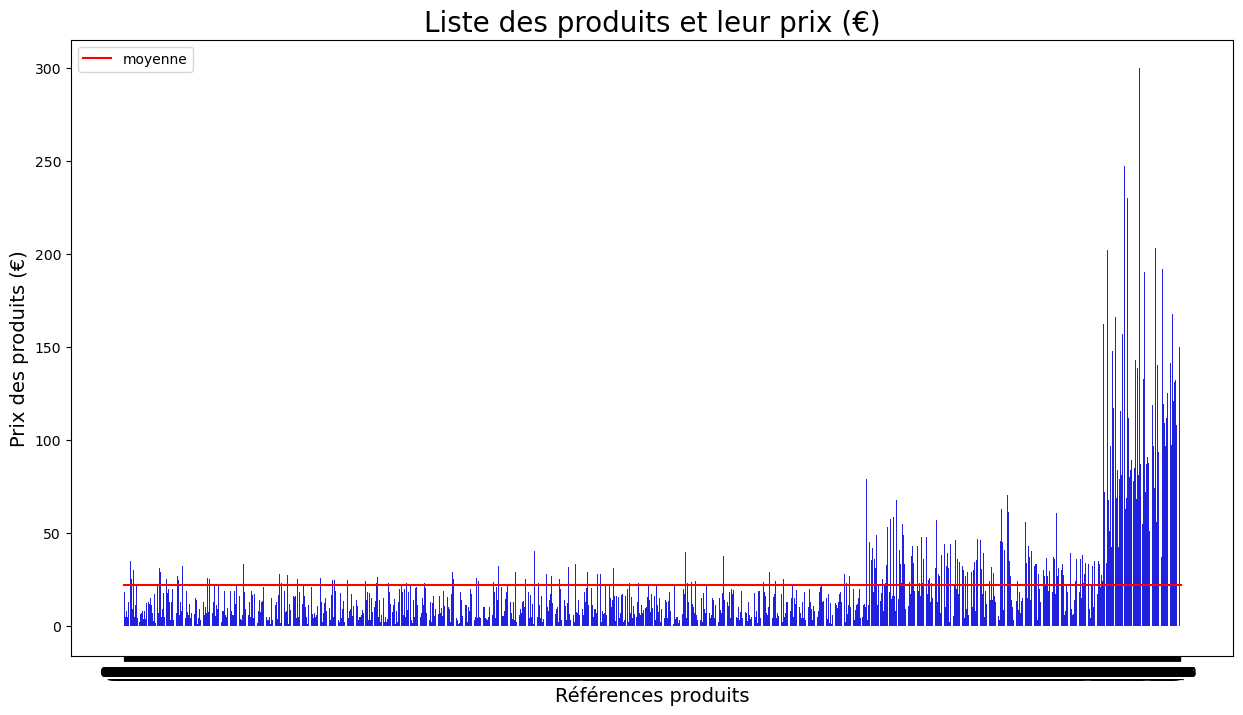

In [4]:
# Classement des produits par référence

products_tri = products.sort_values(by="id_prod")

# Graphique des produits et de leurs prix

#products_tri.plot(x="id_prod", y="price", color="b", figsize=(15,8))  #Chargement rapide en plt

plt.figure(figsize=(15,8))
sns.barplot(x="id_prod", y="price", data=products_tri, color="b")

plt.plot([0,3287], [21.86,21.86], color="r", label="moyenne")

plt.xlabel("Références produits", fontsize=14)
plt.ylabel("Prix des produits (€)", fontsize=14)
plt.title("Liste des produits et leur prix (€)", size=20)
plt.legend()

plt.show()

In [5]:
# Détection des catégories de produits et leurs références

nbre_categ = products["categ"].nunique()
categ = products["categ"].unique()

print("Il existe", nbre_categ, "catégories de produits classées comme suit :", categ, ".")

products_categ0 = products.loc[products["categ"] == 0,:]
products_categ1 = products.loc[products["categ"] == 1,:]
products_categ2 = products.loc[products["categ"] == 2,:]

print("\nLes références produits de la catégorie 0 sont :")
display(products_categ0)
print("Le prix moyen des produits de la catégorie 0 est de", round(products_categ0["price"].mean(),2), "€")

print("\nLes références produits de la catégorie 1 sont :")
display(products_categ1)
print("Le prix moyen des produits de la catégorie 1 est de", round(products_categ1["price"].mean(),2), "€")

print("\nLes références produits de la catégorie 2 sont :")
display(products_categ2)
print("Le prix moyen des produits de la catégorie 2 est de", round(products_categ2["price"].mean(),2), "€")


Il existe 3 catégories de produits classées comme suit : [0 1 2] .

Les références produits de la catégorie 0 sont :


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
4,0_1507,3.99,0
5,0_1163,9.99,0
...,...,...,...
3280,0_1314,20.63,0
3281,0_607,14.99,0
3283,0_146,17.14,0
3284,0_802,11.22,0


Le prix moyen des produits de la catégorie 0 est de 11.73 €

Les références produits de la catégorie 1 sont :


,id_prod,price,categ
3,1_587,4.99,1
6,1_463,36.99,1
11,1_178,51.92,1
12,1_143,9.99,1
13,1_314,9.00,1
...,...,...,...
3270,1_651,18.99,1
3272,1_272,4.55,1
3278,1_387,9.99,1
3279,1_331,55.99,1


Le prix moyen des produits de la catégorie 1 est de 25.53 €

Les références produits de la catégorie 2 sont :


,id_prod,price,categ
10,2_228,225.17,2
38,2_100,72.11,2
64,2_89,107.99,2
73,2_225,157.99,2
79,2_187,157.99,2
...,...,...,...
3188,2_99,84.99,2
3196,2_238,93.92,2
3267,2_101,63.99,2
3271,2_123,147.99,2


Le prix moyen des produits de la catégorie 2 est de 108.35 €


Grâce au graphique de la liste des produits et à la détection des catégories, nous indentifions 3 catégories qui sont 0, 1 et 2. Les références produits commencent par le numéro de la catégorie dont ils font partie.

La moyenne des prix de la catégorie 0 est de : 11.73 €

La moyenne des prix de la catégorie 1 est de : 25.53 €

La moyenne des prix de la catégorie 2 est de : 108.35 €

In [6]:
# Détection des valeurs manquantes

products.isnull().mean()

id_prod    0.0
price      0.0
categ      0.0
dtype: float64

La table products ne contient aucune valeur manquante.

In [7]:
# Détection des valeurs négatives dans la colonne price

products.loc[products["price"] < 0,:]

,id_prod,price,categ
731,T_0,-1.0,0


Il existe un produit dans la table products dont l'identifiant est T_0 et qui présente une valeur de prix négative, dans la catégorie 0.

In [8]:
# Vérification de sa correspondance dans la table transactions en filtrant par T_0

print("Identifiant T_0 dans transactions :\n")
transaction_t0 = transactions.loc[transactions["id_prod"] == "T_0",:]
display(transaction_t0.head())

# Nombre de transactions T_0

print("Nombre de transactions T_0 :", transaction_t0["id_prod"].count())

# Affichage des sessions dans lesquelles T_0 apparaît

print("\nAffichage des sessions dans lesquelles T_0 apparaît :", transaction_t0["session_id"].unique())

# Affichage des clients dont la transaction est T_0

liste_client_ct = transaction_t0["client_id"].unique()
print("\nAffichage des clients dont la transaction est T_0 :", liste_client_ct)

Identifiant T_0 dans transactions :



,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0


Nombre de transactions T_0 : 200

Affichage des sessions dans lesquelles T_0 apparaît : ['s_0']

Affichage des clients dont la transaction est T_0 : ['ct_0' 'ct_1']


Il y a 200 transactions du produit T_0. Le produit T_0 correspond uniquement aux sessions s_0 dont la date est noté comme test et concerne les clients ct_0 et ct_1. Il s'agit manifestement de transactions tests.

In [9]:
# Vérification des clients ct_0 et ct_1 dans la table customers

customers.loc[customers["client_id"].isin(liste_client_ct),:]

,client_id,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001


Les clients ct_0 et ct_1 correspondent respectivement à une femme et un homme nés tous les 2 en 2001. Nous allons vérifier si ils sont réels ou fictifs pour des transactions de tests, en observant leur historique d'achats.

In [10]:
# Recherche des transactions des clients ct_0 et ct_1

print("Transactions des clients ct_0 et ct_1 :\n")
transactions_ct = transactions.loc[transactions["client_id"].isin(liste_client_ct),:]
display(transactions_ct.head())

print("Produits achetés par les clients ct_0 et ct_1 :", transactions_ct["id_prod"].unique())

Transactions des clients ct_0 et ct_1 :



,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0


Produits achetés par les clients ct_0 et ct_1 : ['T_0']


 Les clients ct_0 et ct_1 ont effectué seulement des transactions tests d'une valeur de - 1 €. Il ne s'agit donc pas de clients réels. Ils pourront être écartés de la base de données pour notre analyse des clients réels.

In [11]:
# Création de la table products_1 en excluant les produits dont l'identifiant id_prod est égal à T_0

products_1 = products.loc[products["id_prod"] != "T_0",:]
print("Table products_1 :\n")
display(products_1.head())
display(products_1.info())
display(products_1.describe())

Table products_1 :



,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3286 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 102.7+ KB


None

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


### - Création d'une fonction de vérification de la présence de doublons dans chaque colonne :

```
def testpk(df, colonnes):
    if df[colonnes].duplicated().unique().any() == False:
        print("La colonne", colonnes, "ne comporte pas de doublons")
        print("Elle peut être utilisée comme clé primaire")
    else:
        print("la colonne", colonnes, "comporte des doublons")
        print("Elle ne peut pas être utilisée comme clé primaire")
    print("Le DataFrame comporte", df.shape[0], "lignes et", df.shape[1], "colonnes")
```

In [12]:
# Fonction de test de la colonne pour détecter si la clé candidate ne comporte pas de doublons

def testpk(df, colonnes):
    if df[colonnes].duplicated().unique().any() == False:
        print("La colonne", colonnes, "ne comporte pas de doublons")
        print("Elle peut être utilisée comme clé primaire")
    else:
        print("la colonne", colonnes, "comporte des doublons")
        print("Elle ne peut pas être utilisée comme clé primaire")
    print("Le DataFrame comporte", df.shape[0], "lignes et", df.shape[1], "colonnes")

In [13]:
# Détection des doublons dans la colonne id_prod grâce à la fonction testpk

testpk(products, ["id_prod"])

La colonne ['id_prod'] ne comporte pas de doublons
Elle peut être utilisée comme clé primaire
Le DataFrame comporte 3287 lignes et 3 colonnes


**Nous utiliserons l'identifiant id_prod comme clé primaire.**

### - Nettoyage des données de la table customers

In [14]:
# Affichage des informations de la table customers

print("\nTable customers :\n")
display(customers.head())
display(customers.info())
display(customers.describe())


Table customers :



,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


None

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


La table customers contient 8 623 lignes et 3 colonnes.

**client_id**, de type objet, est l'identifiant client,

**sex**, de type objet, identifie le genre du client,

**birth**, de type entier, détermine l'année de naissance du client.

In [15]:
# Détection des valeurs manquantes

customers.isnull().mean()

client_id    0.0
sex          0.0
birth        0.0
dtype: float64

La table customers ne contient aucune valeur manquante.

In [16]:
# Détection des doublons dans la colonne client_id grâce à la fonction testpk

testpk(customers, ["client_id"])

La colonne ['client_id'] ne comporte pas de doublons
Elle peut être utilisée comme clé primaire
Le DataFrame comporte 8623 lignes et 3 colonnes


**Nous utiliserons l'identifiant client_id comme clé primaire.**

### - Nettoyage des données de la table transactions

In [17]:
# Affichage des informations de la table transactions

print("\nTable transactions :\n")
display(transactions.head())
display(transactions.info())
display(transactions.describe())


Table transactions :



,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


None

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


La table transactions contient 679 532 lignes et 4 colonnes.

**id_prod**, de type objet, est l'identifiant du produit vendu,

**date**, de type objet, détermine la date de la transaction, nous la convertirons au format date,

**session_id**, de type objet, concerne l'identifiant de la session lors de la vente,

**client_id**, de type objet, est l'identifiant du client qui a acheté.

In [18]:
# Eviction des 200 transactions tests dans une nouvelle table transactions_1

mask = transactions[transactions["client_id"].isin(liste_client_ct)].index
transactions_1 = transactions.drop(mask)
transactions_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679332 non-null  object
 1   date        679332 non-null  object
 2   session_id  679332 non-null  object
 3   client_id   679332 non-null  object
dtypes: object(4)
memory usage: 25.9+ MB


Nous avons vu précédemment qu'il y avait 200 transactions tests dans cette table. Nous avons procédé à leur éviction et la nouvelle table contient maintenant 679 332 lignes (soit 679 532 - 200).

In [19]:
# Conversion de la date au format datetime

transactions_1["date"] = pd.to_datetime(transactions_1["date"])

display(transactions_1.head())
transactions_1.info()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


Le type de la date est maintenant au format date en respectant le schéma Y-M-D h:m:s.

In [20]:
# Détection des valeurs manquantes

transactions_1.isnull().mean()

id_prod       0.0
date          0.0
session_id    0.0
client_id     0.0
dtype: float64

La table transactions ne contient aucune valeur manquante.

In [21]:
# Détection des doublons dans la colonne id_prod et client_id grâce à la fonction testpk

testpk(transactions_1, ["id_prod"])
print("")
testpk(transactions_1, ["client_id"])

la colonne ['id_prod'] comporte des doublons
Elle ne peut pas être utilisée comme clé primaire
Le DataFrame comporte 679332 lignes et 4 colonnes

la colonne ['client_id'] comporte des doublons
Elle ne peut pas être utilisée comme clé primaire
Le DataFrame comporte 679332 lignes et 4 colonnes


**Les identifiants id_prod et client_id ne peuvent êtres utilisés seuls comme clés primaires car ils contiennent des doublons.**

La table transactions est une table intermédiaire entre les tables products et customers. Elle regroupe l'achat de livres effectué par les clients.

Le nombre de lignes ou id_prod est dupliqué correspond au nombre de ventes de la même référence de livre. Quant à client_id, il s'agit du nombre de clients qui ont acheté.

### - Jointure des tables products et customers avec la table transactions

In [22]:
# Jointure de products avec transactions

prod_transactions = pd.merge(products_1, transactions_1, on="id_prod", how="outer")

# Affichage de la table prod_transactions

print("Table prod_transactions :\n")
display(prod_transactions.head())
prod_transactions.info()

Table prod_transactions :



,id_prod,price,categ,date,session_id,client_id
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389
1,0_1421,19.99,0.0,2022-11-19 03:42:20.707442,s_299590,c_8364
2,0_1421,19.99,0.0,2021-09-19 14:58:46.726179,s_92304,c_3544
3,0_1421,19.99,0.0,2023-01-11 16:04:24.367855,s_325369,c_1025
4,0_1421,19.99,0.0,2021-08-01 19:33:18.877168,s_70071,c_2298


<class 'pandas.core.frame.DataFrame'>
Int64Index: 679353 entries, 0 to 679352
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679353 non-null  object        
 1   price       679132 non-null  float64       
 2   categ       679132 non-null  float64       
 3   date        679332 non-null  datetime64[ns]
 4   session_id  679332 non-null  object        
 5   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 36.3+ MB


La nouvelle table prod_transactions contient 679 353 lignes.

In [23]:
prod_transactions.isnull().sum()

id_prod         0
price         221
categ         221
date           21
session_id     21
client_id      21
dtype: int64

In [24]:
# Jointure de prod_transactions avec customers

data = pd.merge(prod_transactions, customers, on="client_id", how="outer")

# Affichage de la table data
print("Table data :\n")
display(data.head())
data.info()

Table data :



,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991.0
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991.0
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991.0
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991.0
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 679376 entries, 0 to 679375
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679353 non-null  object        
 1   price       679132 non-null  float64       
 2   categ       679132 non-null  float64       
 3   date        679332 non-null  datetime64[ns]
 4   session_id  679332 non-null  object        
 5   client_id   679355 non-null  object        
 6   sex         679355 non-null  object        
 7   birth       679355 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 46.6+ MB


**La nouvelle table data comporte 679 353 lignes.**

In [25]:
# Affichage des valeurs nulles

data.isnull().sum()

id_prod        23
price         244
categ         244
date           44
session_id     44
client_id      21
sex            21
birth          21
dtype: int64

### - Création d'une fonction de vérification de la présence de valeurs nulles dans chaque colonne :

```
def valnul(df, colonne):
    if df[colonne].isnull().unique().any() == True:
        somme_valnul = df[colonne].isnull().sum()
        print("La colonne", colonne, "comporte", somme_valnul, "valeurs nulles, affichées ci-dessous :")
        display(df.loc[df[colonne].isnull(),:])
    else:
        print("La colonne", colonne, "ne comporte aucune valeur nulle.")
```

In [26]:
# Création d'une fonction qui vérifie la présence de valeurs nulles dans chaque colonne

def valnul(df, colonne):
    if df[colonne].isnull().unique().any() == True:
        somme_valnul = df[colonne].isnull().sum()
        print("La colonne", colonne, "comporte", somme_valnul, "valeurs nulles, affichées ci-dessous :")
        display(df.loc[df[colonne].isnull(),:])
    else:
        print("La colonne", colonne, "ne comporte aucune valeur nulle.")


### - Vérification des valeurs nulles dans chaque colonne

In [27]:
# Localisation des lignes dont la valeur id_prod est nulle

valnul(data, "id_prod")

La colonne id_prod comporte 23 valeurs nulles, affichées ci-dessous :


,id_prod,price,categ,date,session_id,client_id,sex,birth
679353,NaN,NaN,NaN,NaT,NaN,c_8253,f,2001.0
679354,NaN,NaN,NaN,NaT,NaN,c_3789,f,1997.0
679355,NaN,NaN,NaN,NaT,NaN,c_4406,f,1998.0
679356,NaN,NaN,NaN,NaT,NaN,ct_0,f,2001.0
679357,NaN,NaN,NaN,NaT,NaN,c_2706,f,1967.0
679358,NaN,NaN,NaN,NaT,NaN,c_3443,m,1959.0
679359,NaN,NaN,NaN,NaT,NaN,c_4447,m,1956.0
679360,NaN,NaN,NaN,NaT,NaN,c_3017,f,1992.0
679361,NaN,NaN,NaN,NaT,NaN,c_4086,f,1992.0
679362,NaN,NaN,NaN,NaT,NaN,c_6930,m,2004.0


Il s'agit de produits sans références, ni prix, ni catégorie, ni date de transaction.

Néanmoins des clients sont référencés pour ces transactions.

In [28]:
# Localisation des lignes dont la valeur price est nulle (en excluant les lignes dont la valeur id_prod est nulle).

pdt_ss_px = data.loc[(data["price"].isnull()) & (~data["id_prod"].isnull()),:]
display(pdt_ss_px)

# Détection des produits sans prix

print("Le produit de référence", pdt_ss_px["id_prod"].unique()[0], "ne comporte pas de prix. Il apparait", pdt_ss_px["id_prod"].count(), "fois dans la base de données data.")

,id_prod,price,categ,date,session_id,client_id,sex,birth
766,0_2245,NaN,NaN,2022-07-29 04:29:29.995701,s_245285,c_1025,m,1984.0
767,0_2245,NaN,NaN,2021-03-29 04:29:29.995701,s_12938,c_1025,m,1984.0
768,0_2245,NaN,NaN,2022-07-29 02:10:32.403467,s_245233,c_1025,m,1984.0
769,0_2245,NaN,NaN,2021-03-29 02:10:32.403467,s_12886,c_1025,m,1984.0
2096,0_2245,NaN,NaN,2022-07-24 04:18:45.054650,s_242855,c_5953,m,1986.0
...,...,...,...,...,...,...,...,...
653201,0_2245,NaN,NaN,2021-06-17 03:03:12.668129,s_49705,c_1533,m,1972.0
653202,0_2245,NaN,NaN,2022-03-17 03:03:12.668129,s_180212,c_1533,m,1972.0
653203,0_2245,NaN,NaN,2022-09-17 03:03:12.668129,s_269223,c_1533,m,1972.0
653204,0_2245,NaN,NaN,2022-06-17 03:03:12.668129,s_224972,c_1533,m,1972.0


Le produit de référence 0_2245 ne comporte pas de prix. Il apparait 221 fois dans la base de données data.


In [29]:
# Détection de la catégorie de produits de la référence 0_2245

pdt_ss_px.loc[pdt_ss_px["id_prod"]=="0_2245", "categ"].unique()

array([nan])

Le produit de référence 0_2245 n'affiche aucun prix ni aucune catégorie. En respectant la logique des références produits, il commence par 0 et appartient donc à la catégorie 0.

Il n'a pas été détecté dans la table products car il n'y figure pas. Il est uniquement présent dans la table transactions.

Néanmoins il fait l'objet de plusieurs ventes avec des clients différents et à des périodes différentes.

Nous ne le supprimons pas car le produit existe et qu'il suffira de renseigner son prix et sa catégorie ultérieurement. 

Cependant dans l'état il n'entre pas dans le calcul du chiffre d'affaires. 

**Je décide donc de créer une base de données en parallèle, nommée data_simulation, qui remplacera le prix du produit de référence 0_2245 par la moyenne des prix de la catégorie 0. Il s'agit d'une imputation ou remplacement par une valeur estimée valable pour l'analyse. L'emploi de cette nouvelle base de données sera annoncé clairement dans l'énoncé des analyses, si elle doit intervenir.**

### - Création de la base de données data_simulation

In [30]:
# Moyenne des prix de la catégorie 0

products_categ0_mean = round(products_categ0["price"].mean(),2)
print("La moyenne des prix de la catégorie 0 est de :", products_categ0_mean, "€.")

# Création de la table data_simulation

data_simulation = data.copy()

# Remplacement du prix de la référence 0_2245 par la moyenne des prix de catégorie 0

data_simulation.loc[data_simulation["id_prod"] == "0_2245", "price"] = products_categ0_mean

# Vérification du changement de prix

data_simulation.loc[data_simulation["id_prod"]=="0_2245",:]

La moyenne des prix de la catégorie 0 est de : 11.73 €.


,id_prod,price,categ,date,session_id,client_id,sex,birth
766,0_2245,11.73,NaN,2022-07-29 04:29:29.995701,s_245285,c_1025,m,1984.0
767,0_2245,11.73,NaN,2021-03-29 04:29:29.995701,s_12938,c_1025,m,1984.0
768,0_2245,11.73,NaN,2022-07-29 02:10:32.403467,s_245233,c_1025,m,1984.0
769,0_2245,11.73,NaN,2021-03-29 02:10:32.403467,s_12886,c_1025,m,1984.0
2096,0_2245,11.73,NaN,2022-07-24 04:18:45.054650,s_242855,c_5953,m,1986.0
...,...,...,...,...,...,...,...,...
653201,0_2245,11.73,NaN,2021-06-17 03:03:12.668129,s_49705,c_1533,m,1972.0
653202,0_2245,11.73,NaN,2022-03-17 03:03:12.668129,s_180212,c_1533,m,1972.0
653203,0_2245,11.73,NaN,2022-09-17 03:03:12.668129,s_269223,c_1533,m,1972.0
653204,0_2245,11.73,NaN,2022-06-17 03:03:12.668129,s_224972,c_1533,m,1972.0


**Le changement de prix a bien été opéré. Dans la nouvelle table data_simulation, le prix de la référence 0_2245 est maintenant de 11.73 €.**

### - Vérification des valeurs nulles dans les colonnes suivantes

In [31]:
# Localisation des lignes dont la valeur categ est nulle

valnul(data, "categ")

La colonne categ comporte 244 valeurs nulles, affichées ci-dessous :


,id_prod,price,categ,date,session_id,client_id,sex,birth
766,0_2245,NaN,NaN,2022-07-29 04:29:29.995701,s_245285,c_1025,m,1984.0
767,0_2245,NaN,NaN,2021-03-29 04:29:29.995701,s_12938,c_1025,m,1984.0
768,0_2245,NaN,NaN,2022-07-29 02:10:32.403467,s_245233,c_1025,m,1984.0
769,0_2245,NaN,NaN,2021-03-29 02:10:32.403467,s_12886,c_1025,m,1984.0
2096,0_2245,NaN,NaN,2022-07-24 04:18:45.054650,s_242855,c_5953,m,1986.0
...,...,...,...,...,...,...,...,...
679371,NaN,NaN,NaN,NaT,NaN,c_7584,f,1960.0
679372,NaN,NaN,NaN,NaT,NaN,c_90,m,2001.0
679373,NaN,NaN,NaN,NaT,NaN,c_587,m,1993.0
679374,NaN,NaN,NaN,NaT,NaN,ct_1,m,2001.0


In [32]:
# Localisation des lignes dont la valeur date est nulle

valnul(data, "date")

La colonne date comporte 44 valeurs nulles, affichées ci-dessous :


,id_prod,price,categ,date,session_id,client_id,sex,birth
607282,0_1016,35.06,0.0,NaT,NaN,NaN,NaN,NaN
607283,0_1780,1.67,0.0,NaT,NaN,NaN,NaN,NaN
607284,0_1062,20.08,0.0,NaT,NaN,NaN,NaN,NaN
607285,0_1119,2.99,0.0,NaT,NaN,NaN,NaN,NaN
607286,0_1014,1.15,0.0,NaT,NaN,NaN,NaN,NaN
607287,1_0,31.82,1.0,NaT,NaN,NaN,NaN,NaN
607288,0_1318,20.92,0.0,NaT,NaN,NaN,NaN,NaN
607289,0_1800,22.05,0.0,NaT,NaN,NaN,NaN,NaN
607290,0_1645,2.99,0.0,NaT,NaN,NaN,NaN,NaN
607291,0_322,2.99,0.0,NaT,NaN,NaN,NaN,NaN


In [33]:
# Localisation des lignes dont la valeur session_id est nulle

valnul(data, "session_id")

La colonne session_id comporte 44 valeurs nulles, affichées ci-dessous :


,id_prod,price,categ,date,session_id,client_id,sex,birth
607282,0_1016,35.06,0.0,NaT,NaN,NaN,NaN,NaN
607283,0_1780,1.67,0.0,NaT,NaN,NaN,NaN,NaN
607284,0_1062,20.08,0.0,NaT,NaN,NaN,NaN,NaN
607285,0_1119,2.99,0.0,NaT,NaN,NaN,NaN,NaN
607286,0_1014,1.15,0.0,NaT,NaN,NaN,NaN,NaN
607287,1_0,31.82,1.0,NaT,NaN,NaN,NaN,NaN
607288,0_1318,20.92,0.0,NaT,NaN,NaN,NaN,NaN
607289,0_1800,22.05,0.0,NaT,NaN,NaN,NaN,NaN
607290,0_1645,2.99,0.0,NaT,NaN,NaN,NaN,NaN
607291,0_322,2.99,0.0,NaT,NaN,NaN,NaN,NaN


Il y a 44 valeurs nulles concernant la date et la session d'achat qui sont liées.

In [34]:
# Localisation des lignes dont la valeur client_id est nulle

valnul(data, "client_id")

La colonne client_id comporte 21 valeurs nulles, affichées ci-dessous :


,id_prod,price,categ,date,session_id,client_id,sex,birth
607282,0_1016,35.06,0.0,NaT,NaN,NaN,NaN,NaN
607283,0_1780,1.67,0.0,NaT,NaN,NaN,NaN,NaN
607284,0_1062,20.08,0.0,NaT,NaN,NaN,NaN,NaN
607285,0_1119,2.99,0.0,NaT,NaN,NaN,NaN,NaN
607286,0_1014,1.15,0.0,NaT,NaN,NaN,NaN,NaN
607287,1_0,31.82,1.0,NaT,NaN,NaN,NaN,NaN
607288,0_1318,20.92,0.0,NaT,NaN,NaN,NaN,NaN
607289,0_1800,22.05,0.0,NaT,NaN,NaN,NaN,NaN
607290,0_1645,2.99,0.0,NaT,NaN,NaN,NaN,NaN
607291,0_322,2.99,0.0,NaT,NaN,NaN,NaN,NaN


In [35]:
# Localisation des lignes dont la valeur sex est nulle

valnul(data, "sex")

La colonne sex comporte 21 valeurs nulles, affichées ci-dessous :


,id_prod,price,categ,date,session_id,client_id,sex,birth
607282,0_1016,35.06,0.0,NaT,NaN,NaN,NaN,NaN
607283,0_1780,1.67,0.0,NaT,NaN,NaN,NaN,NaN
607284,0_1062,20.08,0.0,NaT,NaN,NaN,NaN,NaN
607285,0_1119,2.99,0.0,NaT,NaN,NaN,NaN,NaN
607286,0_1014,1.15,0.0,NaT,NaN,NaN,NaN,NaN
607287,1_0,31.82,1.0,NaT,NaN,NaN,NaN,NaN
607288,0_1318,20.92,0.0,NaT,NaN,NaN,NaN,NaN
607289,0_1800,22.05,0.0,NaT,NaN,NaN,NaN,NaN
607290,0_1645,2.99,0.0,NaT,NaN,NaN,NaN,NaN
607291,0_322,2.99,0.0,NaT,NaN,NaN,NaN,NaN


In [36]:
# Localisation des lignes dont la valeur birth est nulle

valnul(data, "birth")

La colonne birth comporte 21 valeurs nulles, affichées ci-dessous :


,id_prod,price,categ,date,session_id,client_id,sex,birth
607282,0_1016,35.06,0.0,NaT,NaN,NaN,NaN,NaN
607283,0_1780,1.67,0.0,NaT,NaN,NaN,NaN,NaN
607284,0_1062,20.08,0.0,NaT,NaN,NaN,NaN,NaN
607285,0_1119,2.99,0.0,NaT,NaN,NaN,NaN,NaN
607286,0_1014,1.15,0.0,NaT,NaN,NaN,NaN,NaN
607287,1_0,31.82,1.0,NaT,NaN,NaN,NaN,NaN
607288,0_1318,20.92,0.0,NaT,NaN,NaN,NaN,NaN
607289,0_1800,22.05,0.0,NaT,NaN,NaN,NaN,NaN
607290,0_1645,2.99,0.0,NaT,NaN,NaN,NaN,NaN
607291,0_322,2.99,0.0,NaT,NaN,NaN,NaN,NaN


Il y a 21 valeurs nulles concernant les clients, leur genre et leur année de naissance.

# B) Analyse

### - Calcul du chiffre d'affaires total (base de données data)

In [37]:
# Calcul du chiffre d'affaires total (Table data)

chiffre_affaires = data.groupby("id_prod")["price"].sum()
total_ca = chiffre_affaires.sum()

# format de numération locale

import locale 

# Récupération du format de numération local pour séparer les milliers

locale.setlocale(locale.LC_ALL, '')
total_ca = locale.format_string("%d", total_ca, grouping=True)

# période étudiée

date_string_debut = data["date"].min()
date_debut = date_string_debut.strftime("%d/%m/%Y")
date_string_fin = data["date"].max()
date_fin = date_string_fin.strftime("%d/%m/%Y")

print("Le chiffre d'affaires total réalisé en ligne représente", total_ca, "€, sur la période allant du", date_debut, "jusqu'au", date_fin, ".")

Le chiffre d'affaires total réalisé en ligne représente 11 854 523 €, sur la période allant du 01/03/2021 jusqu'au 28/02/2023 .


### - Calcul du chiffre d'affaires total (base de données data_simulation)

In [38]:
# Calcul du chiffre d'affaires total(Table data_simulation)

chiffre_affaires_simu = data_simulation.groupby("id_prod")["price"].sum()
total_ca = chiffre_affaires_simu.sum()

# Récupération du format de numération local pour séparer les milliers

locale.setlocale(locale.LC_ALL, '')
total_ca = locale.format_string("%d", total_ca, grouping=True)

# période étudiée

date_string_debut = data_simulation["date"].min()
date_debut = date_string_debut.strftime("%d/%m/%Y")
date_string_fin = data_simulation["date"].max()
date_fin = date_string_fin.strftime("%d/%m/%Y")

print("Le chiffre d'affaires total réalisé en ligne représente", total_ca, "€, sur la période allant du", date_debut, "jusqu'au", date_fin, ".")

Le chiffre d'affaires total réalisé en ligne représente 11 857 116 €, sur la période allant du 01/03/2021 jusqu'au 28/02/2023 .


En comparant la base de données data avec data_simulation, nous observons une différence de chiffre d'affaires total de 2 593 €. Cela représente + 0,02 %, ce qui est négligeable.

L'imputation du prix de la référence 0_2245 n'a que très peu d'impact sur le chiffre d'affaires.

### - Evolution du chiffre d'affaires dans le temps

In [39]:
# Sélection des dates qui ne sont pas nulles (NaT)

mask = data[~data["date"].isna()]

# Extraction de l'année, du mois et du jour dans 3 nouvelles colonnes

data["date_y"] = mask["date"].dt.strftime("%Y")
data["date_m"] = mask["date"].dt.strftime("%m")
data["date_d"] = mask["date"].dt.strftime("%d")

# Regroupement de l'année, du mois et du jour dans une colonne date_y_m_d

data["date_y_m_d"] = data["date_y"] + "-" + data["date_m"] + "-" + data["date_d"]

# Regroupement de l'année et du mois dans une colonne date_y_m

data["date_y_m"] = data["date_y"] + "-" + data["date_m"]

# Affichage et infos de la nouvelle table

print("Informations sur la nouvelle table data :\n")
data.info()
print("\nTable data avec la colonne date_y_m :")
data.head()

Informations sur la nouvelle table data :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679376 entries, 0 to 679375
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679353 non-null  object        
 1   price       679132 non-null  float64       
 2   categ       679132 non-null  float64       
 3   date        679332 non-null  datetime64[ns]
 4   session_id  679332 non-null  object        
 5   client_id   679355 non-null  object        
 6   sex         679355 non-null  object        
 7   birth       679355 non-null  float64       
 8   date_y      679332 non-null  object        
 9   date_m      679332 non-null  object        
 10  date_d      679332 non-null  object        
 11  date_y_m_d  679332 non-null  object        
 12  date_y_m    679332 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 72.6+ MB

Table data avec la colonne date_y_m :


,id_prod,price,categ,date,session_id,client_id,sex,birth,date_y,date_m,date_d,date_y_m_d,date_y_m
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991.0,2022,02,20,2022-02-20,2022-02
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991.0,2022,10,20,2022-10-20,2022-10
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991.0,2021,10,09,2021-10-09,2021-10
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991.0,2021,04,28,2021-04-28,2021-04
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991.0,2021,07,15,2021-07-15,2021-07


In [40]:
# Localisation des données dont les dates sont nulles

dates_nulles = data.loc[data["date"].isnull(),:]
display(dates_nulles)

# Calcul du chiffre d'affaires des produits vendus à ces dates non renseignées

print("\nLe chiffre d'affaires généré par la vente de produits dont la date n'est pas renseignée représente", round(dates_nulles["price"].sum(),2), "€.")

,id_prod,price,categ,date,session_id,client_id,sex,birth,date_y,date_m,date_d,date_y_m_d,date_y_m
607282,0_1016,35.06,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607283,0_1780,1.67,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607284,0_1062,20.08,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607285,0_1119,2.99,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607286,0_1014,1.15,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607287,1_0,31.82,1.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607288,0_1318,20.92,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607289,0_1800,22.05,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607290,0_1645,2.99,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607291,0_322,2.99,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Le chiffre d'affaires généré par la vente de produits dont la date n'est pas renseignée représente 795.28 €.


In [41]:
# Regroupement du chiffre d'affaires par mois et années

data_ca_ym = data.groupby("date_y_m")["price"].sum().reset_index()
data_ca_ym

,date_y_m,price
0,2021-03,482440.61
1,2021-04,476109.30
2,2021-05,492943.47
3,2021-06,484088.56
4,2021-07,482835.40
5,2021-08,482284.79
6,2021-09,507240.68
7,2021-10,320798.74
8,2021-11,516167.73
9,2021-12,525917.28


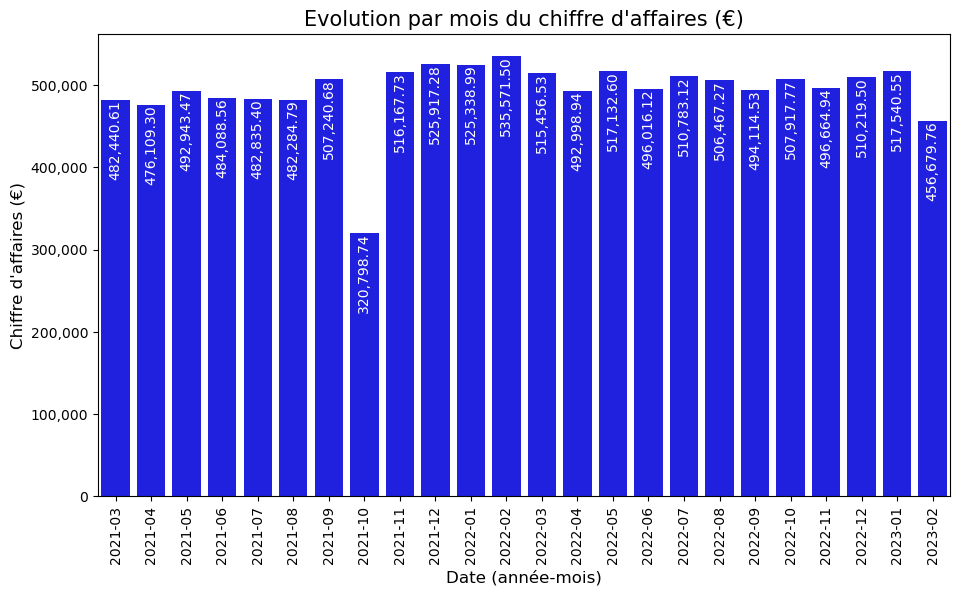

In [42]:
# Représentation graphique de l'évolution du chiffre d'affaires dans le temps

plt.figure(figsize=(11,6))

plt.xticks(rotation = "vertical")
sns.barplot(x=data_ca_ym["date_y_m"], y=data_ca_ym["price"], color="blue")

# Ajout des valeurs de chiffre d'affaires sur chaque barre (alignement vertical)
for i, v in enumerate(data_ca_ym['price']):
    plt.text(i, v, f"{v:,.2f}", ha='center', va='top', color="w", rotation=90)

plt.ylabel("Chiffre d'affaires (€)", fontsize=12)

# Séparateur des milliers sur l'axe des ordonnées
ax = plt.gca()
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.xlabel("Date (année-mois)", fontsize=12)
plt.title("Evolution par mois du chiffre d'affaires (€)", fontsize=15)

plt.show()

### - Zoom sur le mois d'octobre 2021

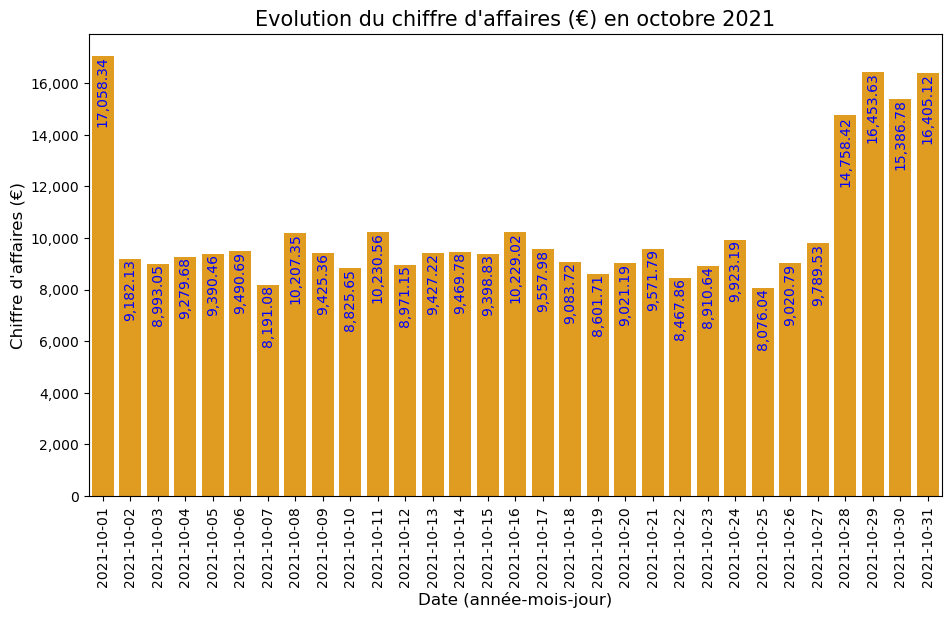

In [43]:
# Regroupement du chiffre d'affaires par jour, mois et années

data_ca_ymd = data.groupby(["date_y_m_d", "date_y_m"])["price"].sum().reset_index()
data_ca_ymd_oct21 = data_ca_ymd.loc[data_ca_ymd["date_y_m"]=="2021-10",:]

# Représentation graphique de l'évolution du chiffre d'affaires pour le mois d'octobre 2021

plt.figure(figsize=(11,6))

plt.xticks(rotation = "vertical")
sns.barplot(x=data_ca_ymd_oct21["date_y_m_d"], y=data_ca_ymd_oct21["price"], color="orange")

# Ajout des valeurs de chiffre d'affaires sur chaque barre (alignement vertical)
for i, v in enumerate(data_ca_ymd_oct21['price']):
    plt.text(i, v, f"{v:,.2f}", ha='center', va='top', color="b", rotation=90)

plt.ylabel("Chiffre d'affaires (€)", fontsize=12)

# Séparateur des milliers sur l'axe des ordonnées
ax = plt.gca()
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.xlabel("Date (année-mois-jour)", fontsize=12)
plt.title("Evolution du chiffre d'affaires (€) en octobre 2021", fontsize=15)

plt.show()

À l'issue de ces 2 graphiques nous constatons que le mois d'octobre 2021 affiche un chiffre d'affaires en retrait en comparaison avec les autres mois qui suivent une certaine moyenne.

En effectuant un zoom sur ce mois, nous pouvons préciser que le recul du chiffre d'affaires commence le 2 octobre 2021 jusqu'au
27 octobre 2021.

Nous allons identifier les ventes pour ce mois en filtrant les prix de ventes nuls, car le chiffre d'affaires est calculée sur celui-ci.

### - Identification des ventes pour le mois d'octobre 2021

In [44]:
# Filtrage des ventes pour le mois d'octobre 2021, dont le prix de vente est nul

data.loc[(data["date_y_m"] == "2021-10") & (data["price"].isnull()),:]

,id_prod,price,categ,date,session_id,client_id,sex,birth,date_y,date_m,date_d,date_y_m_d,date_y_m
81678,0_2245,NaN,NaN,2021-10-04 13:36:19.612226,s_99885,c_1514,f,1982.0,2021,10,04,2021-10-04,2021-10
83642,0_2245,NaN,NaN,2021-10-19 09:32:03.667461,s_107022,c_6128,m,1986.0,2021,10,19,2021-10-19,2021-10
126060,0_2245,NaN,NaN,2021-10-19 00:28:01.920054,s_106841,c_3953,f,1984.0,2021,10,19,2021-10-19,2021-10
260322,0_2245,NaN,NaN,2021-10-04 21:20:27.540982,s_100047,c_8138,f,1984.0,2021,10,04,2021-10-04,2021-10
330664,0_2245,NaN,NaN,2021-10-26 03:31:42.296144,s_110231,c_8286,f,1980.0,2021,10,26,2021-10-26,2021-10
547746,0_2245,NaN,NaN,2021-10-20 13:11:05.671456,s_107564,c_1746,m,1994.0,2021,10,20,2021-10-20,2021-10
648965,0_2245,NaN,NaN,2021-10-15 09:31:31.539354,s_105069,c_4188,f,1935.0,2021,10,15,2021-10-15,2021-10


Nous constatons que sur le mois d'octobre 2021 nous retrouvons la référence 0_2245 qui ne possède pas de prix.

En renseignant son prix exact nous pourrions récupérer le véritable chiffre d'affaires sur ce mois.

Vérifions si c'est la seule raison de la baisse du chiffre d'affaires de ce mois en réalisant la même opération sur le mois de septembre 2021, qui est un mois réalisant un chiffre d'affaires "régulier" comparativement aux autres mois.

### - Comparaison avec les ventes du mois de septembre 2021

In [45]:
# Filtrage des ventes pour le mois de septembre 2021, dont le prix de vente est nul

data.loc[(data["date_y_m"] == "2021-09") & (data["price"].isnull()),:]

,id_prod,price,categ,date,session_id,client_id,sex,birth,date_y,date_m,date_d,date_y_m_d,date_y_m
30441,0_2245,NaN,NaN,2021-09-06 14:03:40.171938,s_85877,c_1060,f,1973.0,2021,09,06,2021-09-06,2021-09
74043,0_2245,NaN,NaN,2021-09-19 03:08:45.918021,s_92049,c_4935,f,1982.0,2021,09,19,2021-09-19,2021-09
80295,0_2245,NaN,NaN,2021-09-26 17:52:55.561657,s_95930,c_6990,f,1986.0,2021,09,26,2021-09-26,2021-09
131319,0_2245,NaN,NaN,2021-09-25 17:07:45.271509,s_95396,c_8616,m,1984.0,2021,09,25,2021-09-25,2021-09
206819,0_2245,NaN,NaN,2021-09-01 02:46:38.931757,s_83377,c_4283,f,1976.0,2021,09,01,2021-09-01,2021-09
284772,0_2245,NaN,NaN,2021-09-10 08:04:02.763762,s_87678,c_4120,f,1979.0,2021,09,10,2021-09-10,2021-09
286099,0_2245,NaN,NaN,2021-09-03 04:31:18.063440,s_84343,c_5056,f,1991.0,2021,09,03,2021-09-03,2021-09
334954,0_2245,NaN,NaN,2021-09-17 18:39:53.866444,s_91395,c_8026,m,1978.0,2021,09,17,2021-09-17,2021-09
337309,0_2245,NaN,NaN,2021-09-23 07:22:38.636773,s_94139,c_4746,m,1940.0,2021,09,23,2021-09-23,2021-09
456084,0_2245,NaN,NaN,2021-09-11 10:52:05.205583,s_88251,c_3468,f,1981.0,2021,09,11,2021-09-11,2021-09


Notre hypothèse n'est pas vérifiée car en septembre 2021 il y a encore plus de ventes de la référence 0_2245 dont le prix n'est pas renseigné. 

Et ce mois présente un chiffres d'affaires comparables à tous les autres mois.

Nous allons cette fois devoir vérifier un autre critère qui est la catégorie.

### - Evolution du chiffre d'affaires dans le temps par catégories de produits

In [46]:
# Identification des catégories

print("Il existe", data["categ"].nunique(), "catégories de produits qui sont classées par", data["categ"].unique()[:3])

# Evolution du chiffre d'affaires par mois et par catégorie

data_ca_ym_cat = data.groupby(["date_y_m", "categ"])["price"].sum().reset_index()
data_ca_ym_cat.head(10)

Il existe 3 catégories de produits qui sont classées par [0. 1. 2.]


,date_y_m,categ,price
0,2021-03,0.0,193629.17
1,2021-03,1.0,186974.17
2,2021-03,2.0,101837.27
3,2021-04,0.0,205222.46
4,2021-04,1.0,156138.35
5,2021-04,2.0,114748.49
6,2021-05,0.0,196186.72
7,2021-05,1.0,165893.40
8,2021-05,2.0,130863.35
9,2021-06,0.0,167943.15


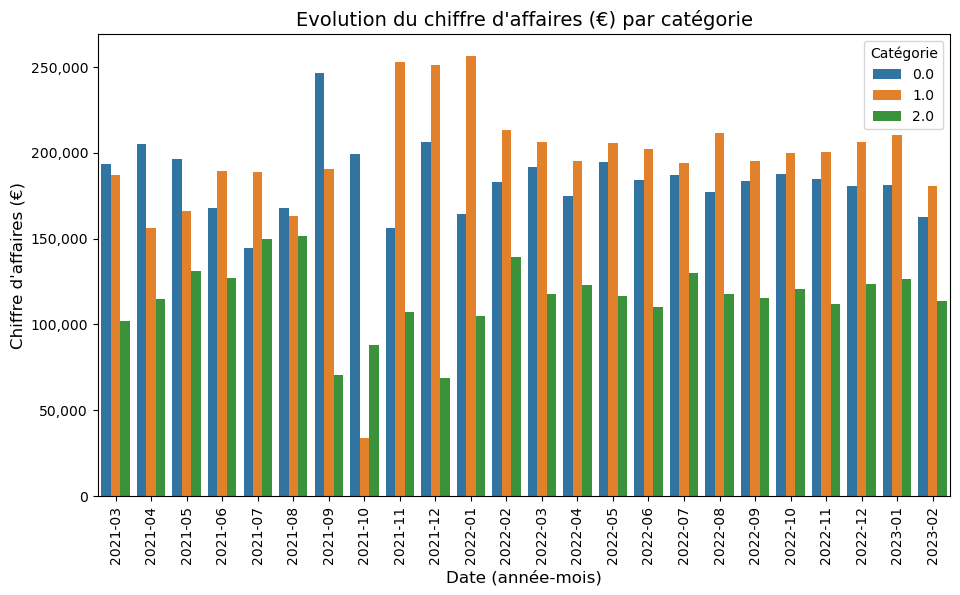

In [47]:
# Représentation graphique de l'évolution du chiffre d'affaires par catégorie

plt.figure(figsize=(11,6))
sns.barplot(x=data_ca_ym_cat["date_y_m"], y=data_ca_ym_cat["price"], hue=data_ca_ym_cat["categ"])

plt.title("Evolution du chiffre d'affaires (€) par catégorie", fontsize=14)
plt.legend(title="Catégorie")
plt.xticks(rotation = "vertical")
plt.xlabel("Date (année-mois)", fontsize=12)
plt.ylabel("Chiffre d'affaires (€)", fontsize=12)

# Séparateur des milliers sur l'axe des ordonnées
ax = plt.gca()
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.show()

### - Identification des catégories vendues pour le mois d'octobre 2021

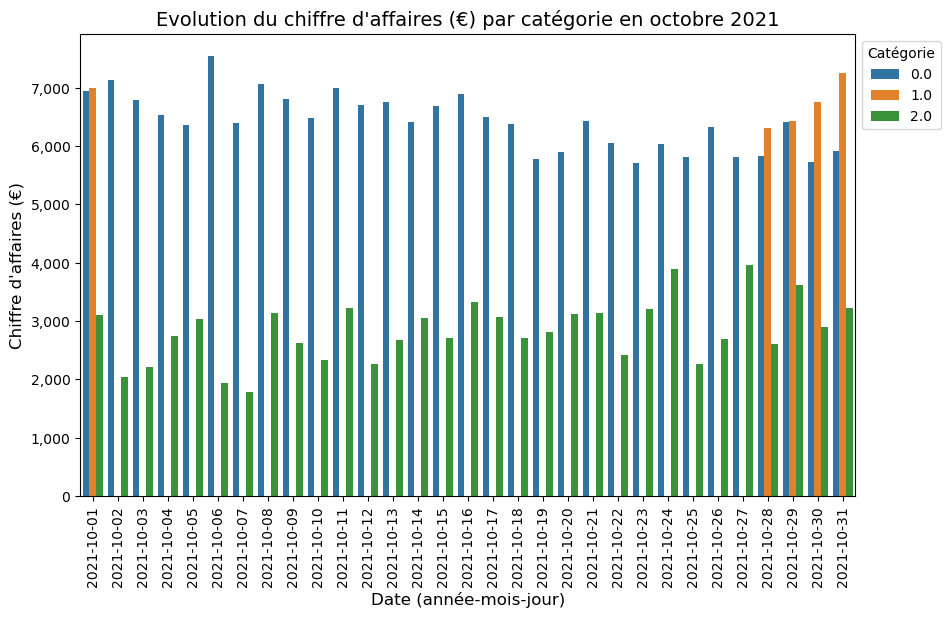

In [48]:
# Evolution du chiffre d'affaires pour le mois d'octobre 2021 et par catégorie

data_ca_ymd_cat = data.groupby(["date_y_m_d", "date_y_m", "categ"])["price"].sum().reset_index()
data_ca_ymd_cat_oct21 = data_ca_ymd_cat.loc[data_ca_ymd_cat["date_y_m"]=="2021-10",:]

# Représentation graphique de l'évolution du chiffre d'affaires par catégorie

plt.figure(figsize=(10,6))
sns.barplot(x=data_ca_ymd_cat_oct21["date_y_m_d"], y=data_ca_ymd_cat_oct21["price"], hue=data_ca_ymd_cat_oct21["categ"])

plt.title("Evolution du chiffre d'affaires (€) par catégorie en octobre 2021", fontsize=14)
plt.legend(title="Catégorie", bbox_to_anchor=(1, 1))
plt.xticks(rotation = "vertical")
plt.xlabel("Date (année-mois-jour)", fontsize=12)
plt.ylabel("Chiffre d'affaires (€)", fontsize=12)


# Séparateur des milliers sur l'axe des ordonnées
ax = plt.gca()
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.show()

À l'aide de ces 2 graphiques de l'évolution du chiffres d'affaires par catégorie nous constatons, pour le mois d'octobre 2021, que la catégorie 1 et 2 sont sous représentées par rapport aux autres mois.

En zoomant sur ce mois nous constatons qu'il n' y a pas de vente de produits de catégorie 1 du 2 au 27 octobre.

La catégorie 2 a chuté de moitié en septembre 2021 et est restée relativement basse en octobre.

Cependant, la catégorie 0 reste dans la moyenne.

**En résumé, nous pouvons avancer que le recul des ventes des produits de catégorie 1 et 2 est le reponsable de la baisse du chiffre d'affaires en octobre 2021. Il ne s'agissait donc pas uniquement de l'absence de prix de la référence 0_2245.**

Nous gardons ce mois dans la base de données ainsi que pour le calcul des statistiques. Sur la période entière ce mois représente 1/24 soit 4 % de la période totale et est représentatif d'une réalité advenue.

### - Décomposition en moyennes mobiles de la tendance globale du chiffre d'affaires

In [49]:
# Moyennes mobiles par mois et trimestre

data_ca_ym["moving_average1"] = data_ca_ym["price"].rolling(1).mean()
data_ca_ym["moving_average3"] = data_ca_ym["price"].rolling(3).mean()
data_ca_ym["moving_average6"] = data_ca_ym["price"].rolling(6).mean()

data_ca_ym

,date_y_m,price,moving_average1,moving_average3,moving_average6
0,2021-03,482440.61,482440.61,NaN,NaN
1,2021-04,476109.30,476109.30,NaN,NaN
2,2021-05,492943.47,492943.47,483831.126667,NaN
3,2021-06,484088.56,484088.56,484380.443333,NaN
4,2021-07,482835.40,482835.40,486622.476667,NaN
5,2021-08,482284.79,482284.79,483069.583333,483450.355000
6,2021-09,507240.68,507240.68,490786.956667,487583.700000
7,2021-10,320798.74,320798.74,436774.736667,461698.606667
8,2021-11,516167.73,516167.73,448069.050000,465569.316667
9,2021-12,525917.28,525917.28,454294.583333,472540.770000


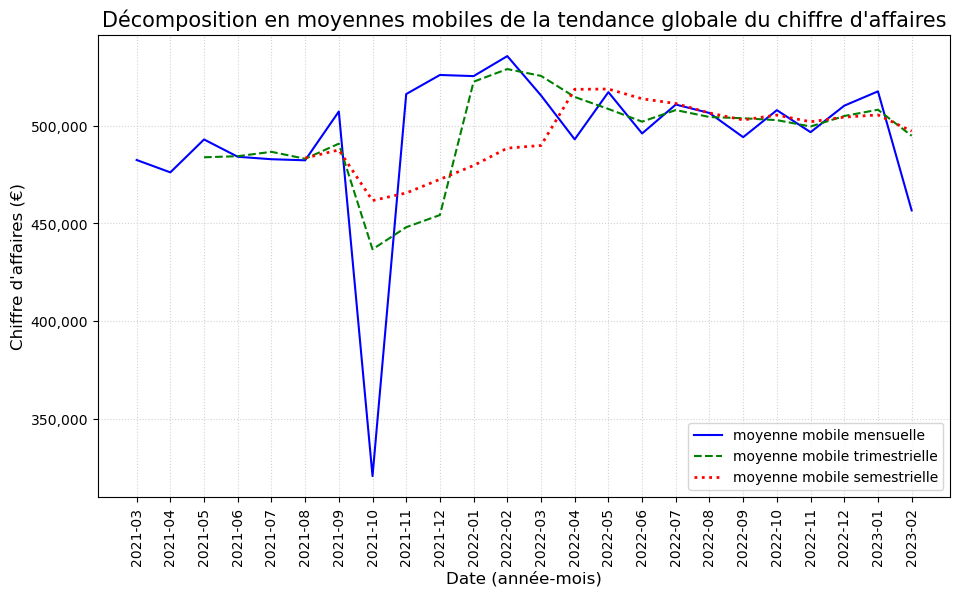

In [154]:
# Représentation graphique de la décomposition en moyennes mobiles de la tendance globale du chiffre d'affaires

plt.figure(figsize=(11,6))

sns.lineplot(data=data_ca_ym, x="date_y_m", y="moving_average1", color="b", label="moyenne mobile mensuelle")
sns.lineplot(data=data_ca_ym, x="date_y_m", y="moving_average3", color="g", label="moyenne mobile trimestrielle", linestyle="dashed")
sns.lineplot(data=data_ca_ym, x="date_y_m", y="moving_average6", color="r", label="moyenne mobile semestrielle", linestyle="dotted", linewidth=2)


plt.xlabel("Date (année-mois)", fontsize=12)
plt.ylabel("Chiffre d'affaires (€)", fontsize=12)
plt.title("Décomposition en moyennes mobiles de la tendance globale du chiffre d'affaires", fontsize=15)

# Séparateur des milliers sur l'axe des ordonnées
ax = plt.gca()
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.grid(color="lightgray", linestyle="dotted")
plt.xticks(rotation="vertical")
plt.legend(loc="lower right")

plt.show()

In [51]:
# Vérification des dates de transactions pour le mois de février 2023 pour savoir si le mois est complet

date_min = data.loc[data["date_y_m"]=="2023-02", "date_y_m_d"].min()
date_max = data.loc[data["date_y_m"]=="2023-02", "date_y_m_d"].max()

print("Les ventes du mois de février commencent le", date_min, "et se terminent le", date_max, "le mois est donc complet.")

Les ventes du mois de février commencent le 2023-02-01 et se terminent le 2023-02-28 le mois est donc complet.


La lecture de la moyenne mobile mensuel en bleu sur ce graphique nous informe sur le net recul des ventes, comme vu précédemment, pour le mois d'octobre 2021.

La tendance générale, en excluant octobre, est haussière de mars 2021 jusqu'à février 2022. Elle se stabilise ensuite entre mars 2022 jusqu'à janvier 2023.

Cependant un recul des ventes est à noter pour le mois de février 2023.

La lecture de la moyenne mobile trimestrielle nous donne une vision plus lissée de la moyenne mobile mensuelle et nous permet de savoir pour chaque mois si nous nous situons au dessus ou en dessus de la moyenne trimestrielle.

### - Calcul du chiffre d'affaires par produits

In [52]:
# Création d'une table temporaire ca_temp

ca_temp = data.copy()
ca_temp.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,date_y,date_m,date_d,date_y_m_d,date_y_m
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991.0,2022,02,20,2022-02-20,2022-02
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991.0,2022,10,20,2022-10-20,2022-10
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991.0,2021,10,09,2021-10-09,2021-10
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991.0,2021,04,28,2021-04-28,2021-04
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991.0,2021,07,15,2021-07-15,2021-07


In [53]:
# Sélection des colonnes utiles pour le calcul du chiffre d'affaires par produit

ca_temp = ca_temp[["id_prod", "price", "categ"]]
ca_temp.head()

,id_prod,price,categ
0,0_1421,19.99,0.0
1,0_1421,19.99,0.0
2,0_2131,8.99,0.0
3,0_1635,16.99,0.0
4,0_166,1.83,0.0


In [54]:
# Ajout d'une colonne nombre_ventes qui compte le nombre de produit unique dans la table CA

counts = ca_temp["id_prod"].value_counts()

# Application de la fonction map pour calculer chaque élément unique de la colonne id_prod

ca_temp["nombre_ventes"] = ca_temp["id_prod"].map(counts)
ca_temp.head()

,id_prod,price,categ,nombre_ventes
0,0_1421,19.99,0.0,1151.0
1,0_1421,19.99,0.0,1151.0
2,0_2131,8.99,0.0,262.0
3,0_1635,16.99,0.0,740.0
4,0_166,1.83,0.0,14.0


In [55]:
# Suppression des lignes dupliquées pour ne laisser apparaitre que les identifiants uniques en entrée 

ca = ca_temp.drop_duplicates(subset=["id_prod"]).copy()
ca.head()

,id_prod,price,categ,nombre_ventes
0,0_1421,19.99,0.0,1151.0
2,0_2131,8.99,0.0,262.0
3,0_1635,16.99,0.0,740.0
4,0_166,1.83,0.0,14.0
6,1_279,27.99,1.0,1090.0


In [56]:
# Création d'une colonne chiffre_affaires

ca["chiffre_affaires"] = ca["price"] * ca["nombre_ventes"]

print("Table du chiffre d'affaires par produits :")
display(ca)
print("\nInformations de la table chiffre d'affaires par produits :\n")
ca.info()
ca.describe()

Table du chiffre d'affaires par produits :


,id_prod,price,categ,nombre_ventes,chiffre_affaires
0,0_1421,19.99,0.0,1151.0,23008.49
2,0_2131,8.99,0.0,262.0,2355.38
3,0_1635,16.99,0.0,740.0,12572.60
4,0_166,1.83,0.0,14.0,25.62
6,1_279,27.99,1.0,1090.0,30509.10
...,...,...,...,...,...
658388,0_1024,30.11,0.0,6.0,180.66
664604,2_81,86.99,2.0,1.0,86.99
668346,2_23,115.99,2.0,1.0,115.99
678775,2_98,149.74,2.0,1.0,149.74



Informations de la table chiffre d'affaires par produits :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3288 entries, 0 to 679353
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_prod           3287 non-null   object 
 1   price             3286 non-null   float64
 2   categ             3286 non-null   float64
 3   nombre_ventes     3287 non-null   float64
 4   chiffre_affaires  3286 non-null   float64
dtypes: float64(4), object(1)
memory usage: 154.1+ KB


,price,categ,nombre_ventes,chiffre_affaires
count,3286.000000,3286.000000,3287.000000,3286.000000
mean,21.863597,0.370359,206.678734,3607.584893
std,29.849786,0.615446,330.662436,7353.902078
min,0.620000,0.000000,1.000000,0.800000
25%,6.990000,0.000000,16.000000,226.867500
50%,13.075000,0.000000,56.000000,781.030000
75%,22.990000,1.000000,236.000000,3377.312500
max,300.000000,2.000000,2252.000000,94893.500000


### - Graphique de corrélation entre chiffre d'affaires et prix des produits 

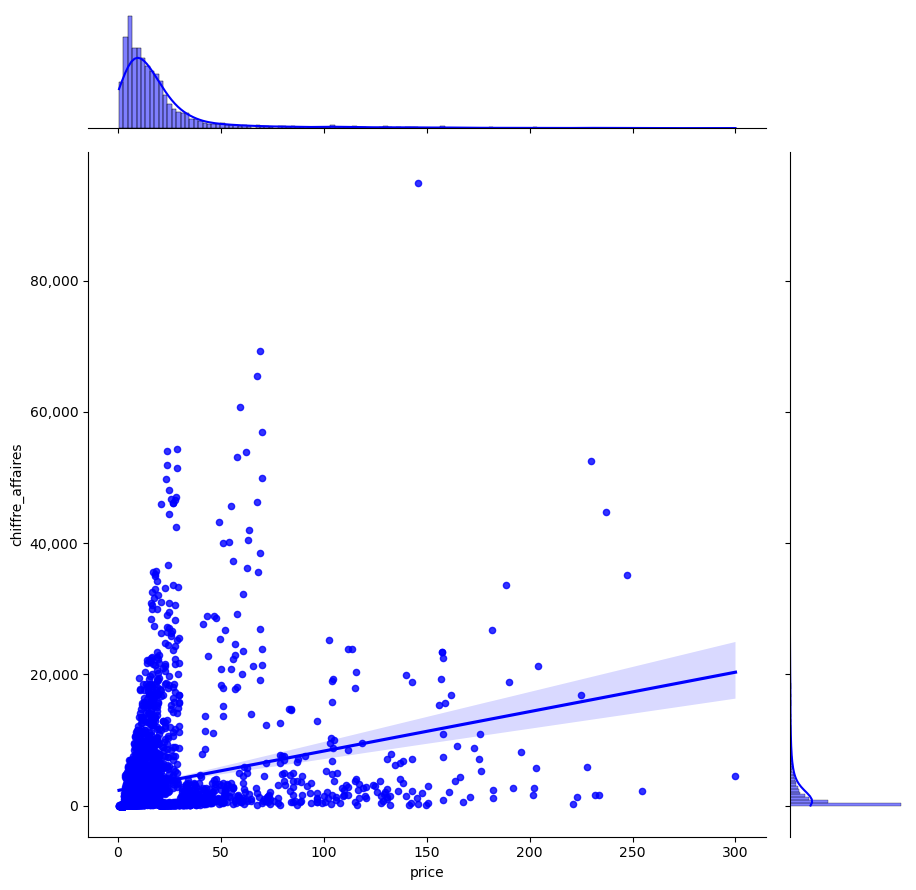

In [57]:
# Exclusion des lignes contenant NaN

mask = ca[~ca["price"].isna()]

# Corrélation entre chiffre d'affaires et prix des produits

sns.jointplot(x="price", y="chiffre_affaires", data=mask, kind='reg', scatter_kws={'s': 20}, color="b", height=9)

plt.xlabel("Prix des produits", fontsize=15)
plt.ylabel("Chiffre d'affaires", fontsize=15)

# Séparateur des milliers sur l'axe des ordonnées
ax = plt.gca()
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.show()

### - Coefficient de corrélation

In [58]:
# Coefficient de Pearson

st.pearsonr(mask["price"],mask["chiffre_affaires"])[0]

0.24402266344387988

D'après le graphique de corrélation, nous constatons une concentration du chiffre d'affaires réalisé grâce à la vente de produits dont le prix se situe entre la valeur minimum et 50 €.

Le coefficient de Pearson est de 0.24, plus proche de 0 que de 1, ce qui nous indique qu'il n'y a pas de corrélation apparente entre le prix du produit et le chiffre d'affaires.

### - Courbe de Lorenz de répartition du chiffre d'affaires par produits

La courbe de Lorenz est une représentation graphique permettant de visualiser la distribution d'une variable au sein de de la population totale.

Dans notre situation il s'agit de représenter la part de chiffre d'affaires générée par chaque produit sur la totalité du chiffre d'affaire des produits.

La médiale est le point de croisement de la moitié de la valeur du chiffre d'affaire total avec la courbe de Lorenz. Elle identifie le partage de la moitié du chiffre d'affaire répartie par les produits.

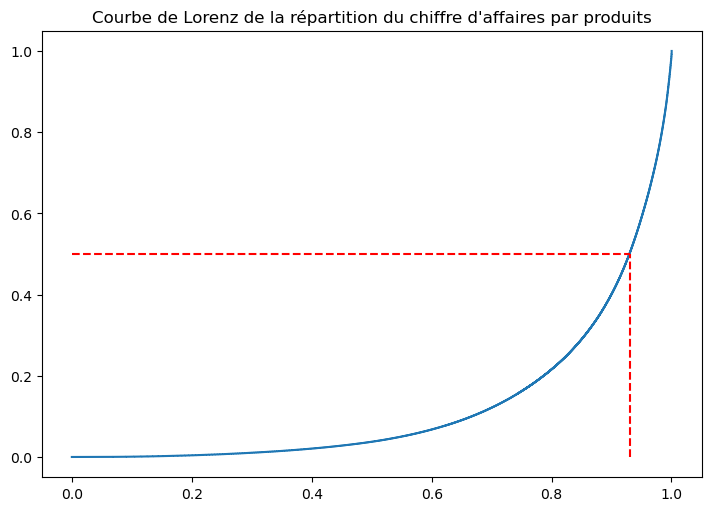

In [59]:
# Courbe de Lorenz

figure = plt.figure(layout="constrained", figsize=(7,5))
ca_lorenz = mask["chiffre_affaires"].values
n = len(ca_lorenz)
lorenz = np.cumsum(np.sort(ca_lorenz)) / ca_lorenz.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.title("Courbe de Lorenz de la répartition du chiffre d'affaires par produits")

# Représentation de la médiale
plt.plot([0,0.93], [0.5,0.5], "r--")
plt.plot([0.93,0.93], [0,0.5], "r--")

plt.show()

Nous constatons qu'environ 93 % des produits vendus représentent la moitié du chiffre d'affaires.

Les 7 % restants sont les produits plus chers et représentent la seconde moitié du chiffre d'affaires.

### - Calcul de l'indice de Gini

**L'indice de Gini** est un indicateur synthétique permettant de rendre compte du niveau d'inégalité pour une variable et sur une population donnée. Il varie entre 0 (égalité parfaite) et 1 (inégalité extrême).

Cet indice nous permet de savoir si le chiffre d'affaires est réparti de manière égalitaire ou non par produits vendus.

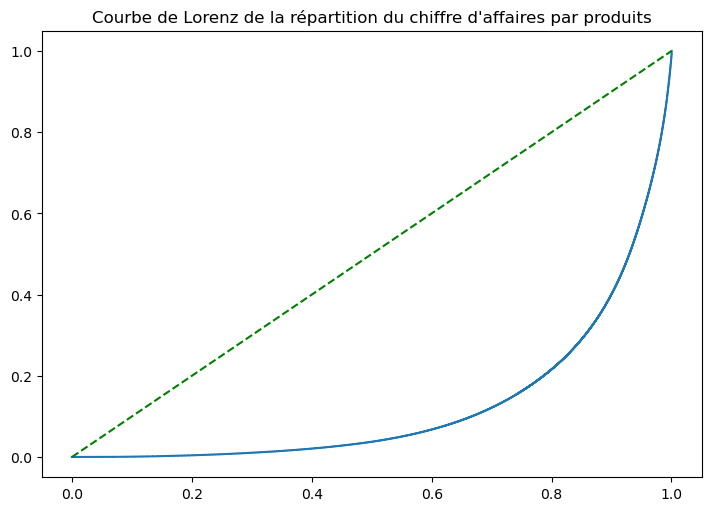

L'indice de Gini représente 0.74


In [60]:
figure = plt.figure(layout="constrained", figsize=(7,5))
ca_lorenz = mask["chiffre_affaires"].values
n = len(ca_lorenz)
lorenz = np.cumsum(np.sort(ca_lorenz)) / ca_lorenz.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.title("Courbe de Lorenz de la répartition du chiffre d'affaires par produits")

# Représentation de la première bissectrice
plt.plot([0,1], [0,1], "g--")

plt.show()

# Indice de Gini
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print("L'indice de Gini représente", round(gini, 2))

Avec une valeur de 0.74, l'indice de Gini est éloigné de 0 et plus proche de 1.

Cela exprime une certaine inégalité dans la répartition du chiffre d'affaires par produits.

### - Références ayant générés le plus et le moins de chiffre d'affaires

In [61]:
# Références générant le plus de chiffre d'affaires

ca_max = ca.sort_values(by="chiffre_affaires", ascending=False).reset_index()
ca_max.head(50)

,index,id_prod,price,categ,nombre_ventes,chiffre_affaires
0,600,2_159,145.99,2.0,650.0,94893.50
1,2138,2_135,68.99,2.0,1005.0,69334.95
2,1166,2_112,67.57,2.0,968.0,65407.76
3,42892,2_102,59.14,2.0,1027.0,60736.78
4,37761,2_209,69.99,2.0,814.0,56971.86
5,2384,1_395,28.99,1.0,1875.0,54356.25
6,201,1_369,23.99,1.0,2252.0,54025.48
7,2135,2_110,62.25,2.0,865.0,53846.25
8,1192,2_39,57.99,2.0,915.0,53060.85
9,43323,2_166,230.04,2.0,228.0,52449.12


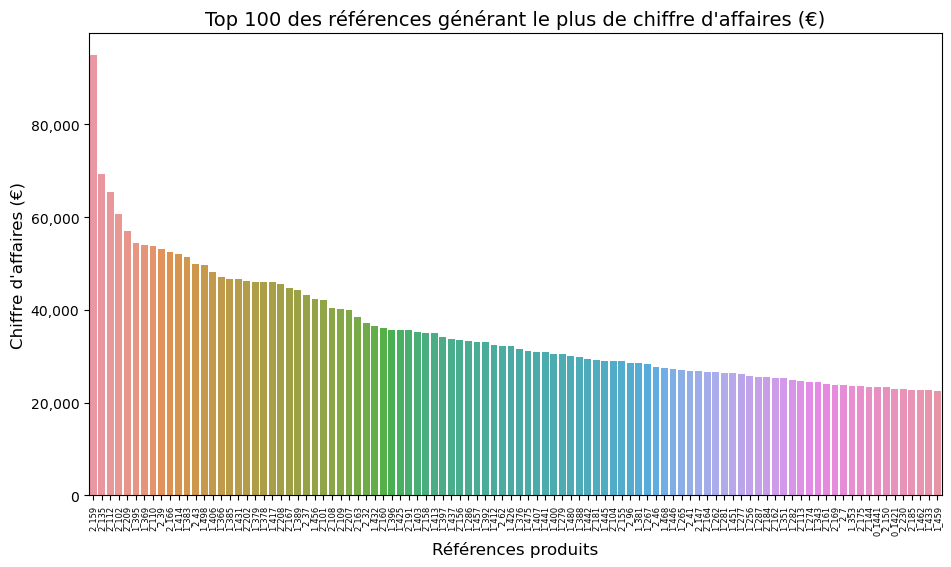

In [62]:
# top 100 des produits générant le plus de chiffre d'affaires

ca_max_100 = ca_max.iloc[:100]

# Représentation graphique des références générant le plus de chiffre d'affaires

plt.figure(figsize=(11,6))
sns.barplot(x=ca_max_100["id_prod"], y=ca_max_100["chiffre_affaires"])

plt.title("Top 100 des références générant le plus de chiffre d'affaires (€)", fontsize=14)
plt.xticks(fontsize=6, rotation = "vertical")
plt.xlabel("Références produits", fontsize=12)
plt.ylabel("Chiffre d'affaires (€)", fontsize=12)

# Séparateur des milliers sur l'axe des ordonnées
ax = plt.gca()
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.show()

In [63]:
# Références générant le moins de chiffre d'affaires

ca_min = ca.sort_values(by="chiffre_affaires").reset_index()
ca_min.head(50)

,index,id_prod,price,categ,nombre_ventes,chiffre_affaires
0,607292,0_1620,0.80,0.0,1.0,0.80
1,178363,0_1539,0.99,0.0,1.0,0.99
2,607286,0_1014,1.15,0.0,1.0,1.15
3,465295,0_1284,1.38,0.0,1.0,1.38
4,607283,0_1780,1.67,0.0,1.0,1.67
5,607297,0_310,1.94,0.0,1.0,1.94
6,482917,0_1653,0.99,0.0,2.0,1.98
7,256986,0_1601,1.99,0.0,1.0,1.99
8,49087,0_541,1.99,0.0,1.0,1.99
9,239866,0_807,1.99,0.0,1.0,1.99


### - Références les plus et les moins vendues (en terme de nombre de ventes)

In [64]:
# Références les plus vendues

vente_max = ca.sort_values(by="nombre_ventes", ascending=False).reset_index()
vente_max.head(50)

,index,id_prod,price,categ,nombre_ventes,chiffre_affaires
0,201,1_369,23.99,1.0,2252.0,54025.48
1,469,1_417,20.99,1.0,2189.0,45947.11
2,163,1_414,23.83,1.0,2180.0,51949.40
3,502,1_498,23.37,1.0,2128.0,49731.36
4,82,1_425,16.99,1.0,2096.0,35611.04
5,281,1_403,17.99,1.0,1960.0,35260.40
6,197,1_412,16.65,1.0,1951.0,32484.15
7,504,1_413,17.99,1.0,1945.0,34990.55
8,112,1_406,24.81,1.0,1939.0,48106.59
9,430,1_407,15.99,1.0,1935.0,30940.65


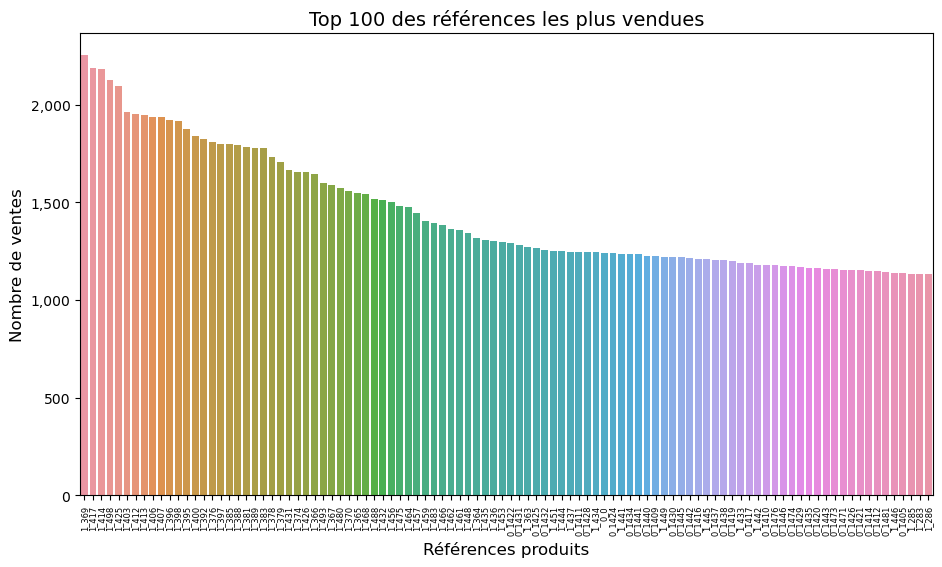

In [65]:
# top 100 des produits les plus vendus

vente_max_100 = vente_max.iloc[:100]

# Représentation graphique des références les plus vendues

plt.figure(figsize=(11,6))
sns.barplot(x=vente_max_100["id_prod"], y=vente_max_100["nombre_ventes"])

plt.title("Top 100 des références les plus vendues", fontsize=14)
plt.xticks(fontsize=6, rotation = "vertical")
plt.xlabel("Références produits", fontsize=12)
plt.ylabel("Nombre de ventes", fontsize=12)

# Séparateur des milliers sur l'axe des ordonnées
ax = plt.gca()
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.show()

In [66]:
# Références les moins vendues

vente_min = ca.sort_values(by="nombre_ventes").reset_index()
vente_min.head(50)

,index,id_prod,price,categ,nombre_ventes,chiffre_affaires
0,678775,2_98,149.74,2.0,1.0,149.74
1,607285,0_1119,2.99,0.0,1.0,2.99
2,607284,0_1062,20.08,0.0,1.0,20.08
3,607283,0_1780,1.67,0.0,1.0,1.67
4,607282,0_1016,35.06,0.0,1.0,35.06
5,668346,2_23,115.99,2.0,1.0,115.99
6,465295,0_1284,1.38,0.0,1.0,1.38
7,457938,0_1683,2.99,0.0,1.0,2.99
8,401146,0_549,2.99,0.0,1.0,2.99
9,328282,0_2201,20.99,0.0,1.0,20.99


### - Répartition des produits vendus par catégories

In [67]:
# Nombre de produits dans chaque catégorie

pdt_categ = ca.groupby("categ")["id_prod"].count().reset_index()
pdt_categ

,categ,id_prod
0,0.0,2308
1,1.0,739
2,2.0,239


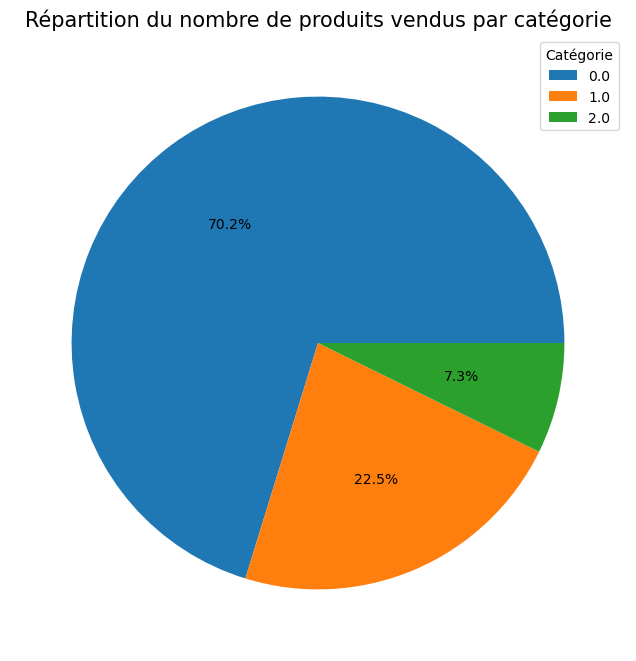

In [68]:
# Représentation en camembert du nombre de références vendues dans chaque catégorie

plt.figure(figsize=(14,8))
plt.pie(data=pdt_categ, x="id_prod", autopct="%1.1f%%")
plt.legend(pdt_categ["categ"], title="Catégorie")
plt.title("Répartition du nombre de produits vendus par catégorie", fontsize=15)

plt.show()

La catégorie 0 regroupe 70 % des ventes, elle représente à elle seule presque les 3/4 des ventes totales.

La catégorie 1 regroupe 22 % des ventes, ce quireprésente quasiment 1/4.

La catégorie 2 ne représente que 7 % des ventes totales, c'est la moins représentée.

In [69]:
# Listing des références générant le plus de chiffre d'affaires par catégorie

print("Liste des références classées par chiffre d'affaires dans la catégorie 0 :")
categ_0 = ca.loc[ca["categ"] == 0, :]
categ_0_sorted = categ_0.sort_values(by="chiffre_affaires", ascending=False)
display(categ_0_sorted.head(10))

print("Liste des références classées par chiffre d'affaires dans la catégorie 1 :")
categ_1 = ca.loc[ca["categ"] == 1, :]
categ_1_sorted = categ_1.sort_values(by="chiffre_affaires", ascending=False)
display(categ_1_sorted.head(10))

print("Liste des références classées par chiffre d'affaires dans la catégorie 2 :")
categ_2 = ca.loc[ca["categ"] == 2, :]
categ_2_sorted = categ_2.sort_values(by="chiffre_affaires", ascending=False)
display(categ_2_sorted.head(10))

Liste des références classées par chiffre d'affaires dans la catégorie 0 :


,id_prod,price,categ,nombre_ventes,chiffre_affaires
182,0_1441,18.99,0.0,1235.0,23452.65
0,0_1421,19.99,0.0,1151.0,23008.49
677,0_1414,19.38,0.0,1150.0,22287.00
138,0_1451,19.99,0.0,1085.0,21689.15
109,0_1417,17.99,0.0,1188.0,21372.12
118,0_1448,18.94,0.0,1093.0,20701.42
829,0_1470,19.53,0.0,1034.0,20194.02
3500,0_1430,16.47,0.0,1221.0,20109.87
136,0_1353,19.99,0.0,972.0,19430.28
2755,0_1355,18.99,0.0,1017.0,19312.83


Liste des références classées par chiffre d'affaires dans la catégorie 1 :


,id_prod,price,categ,nombre_ventes,chiffre_affaires
2384,1_395,28.99,1.0,1875.0,54356.25
201,1_369,23.99,1.0,2252.0,54025.48
163,1_414,23.83,1.0,2180.0,51949.40
762,1_383,28.99,1.0,1776.0,51486.24
502,1_498,23.37,1.0,2128.0,49731.36
112,1_406,24.81,1.0,1939.0,48106.59
1271,1_366,28.54,1.0,1647.0,47005.38
515,1_385,25.99,1.0,1798.0,46730.02
501,1_431,27.99,1.0,1664.0,46575.36
62,1_379,26.99,1.0,1708.0,46098.92


Liste des références classées par chiffre d'affaires dans la catégorie 2 :


,id_prod,price,categ,nombre_ventes,chiffre_affaires
600,2_159,145.99,2.0,650.0,94893.50
2138,2_135,68.99,2.0,1005.0,69334.95
1166,2_112,67.57,2.0,968.0,65407.76
42892,2_102,59.14,2.0,1027.0,60736.78
37761,2_209,69.99,2.0,814.0,56971.86
2135,2_110,62.25,2.0,865.0,53846.25
1192,2_39,57.99,2.0,915.0,53060.85
43323,2_166,230.04,2.0,228.0,52449.12
42395,2_43,69.99,2.0,714.0,49972.86
38118,2_202,67.57,2.0,684.0,46217.88


En consultant ces classements nous constatons que le nombre de vente par catégorie est proportionnellement inverse en terme de chiffres d'affaires.

En effet la catégorie 0, qui représente 70 % des ventes, dégage 23 000 € de chiffre pour sa meilleure référence.

Tandis que la catégorie 2 qui représente 7 % des ventes, dégage un chiffre de 94 000 € pour son produit phare.

Entre les 2, la catégorie 1 qui représente 22 % des ventes, dégage un chiffre de 54 000 € pour son meilleur produit.

### - Répartition du chiffre d'affaires par catégories

In [70]:
# Calcul de la répartition du chiffre d'affaires par catégories

ca_categ = ca.groupby("categ")["chiffre_affaires"].sum().reset_index()
ca_categ

,categ,chiffre_affaires
0,0.0,4419960.03
1,1.0,4653794.24
2,2.0,2780769.69


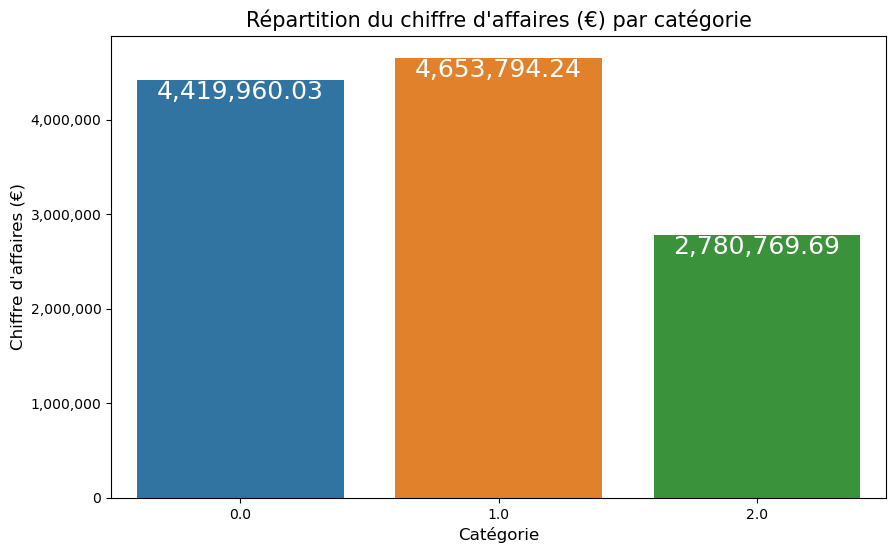

In [71]:
# Représentation graphique en barres de la répartition du chiffre d'affaires par catégories

plt.figure(figsize=(10,6))

sns.barplot(x=ca_categ["categ"], y=ca_categ["chiffre_affaires"])
plt.ticklabel_format(style="plain", axis="y")

plt.title("Répartition du chiffre d'affaires (€) par catégorie", fontsize=15)
plt.xlabel("Catégorie", fontsize=12)
plt.ylabel("Chiffre d'affaires (€)", fontsize=12)

# Séparateur des milliers sur l'axe des ordonnées
ax = plt.gca()
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

# Ajout des valeurs de chiffre d'affaires sur chaque barre
for i, v in enumerate(ca_categ['chiffre_affaires']):
    plt.text(i, v, f"{v:,.2f}", ha='center', va='top', color="w", fontsize=18)

plt.show()

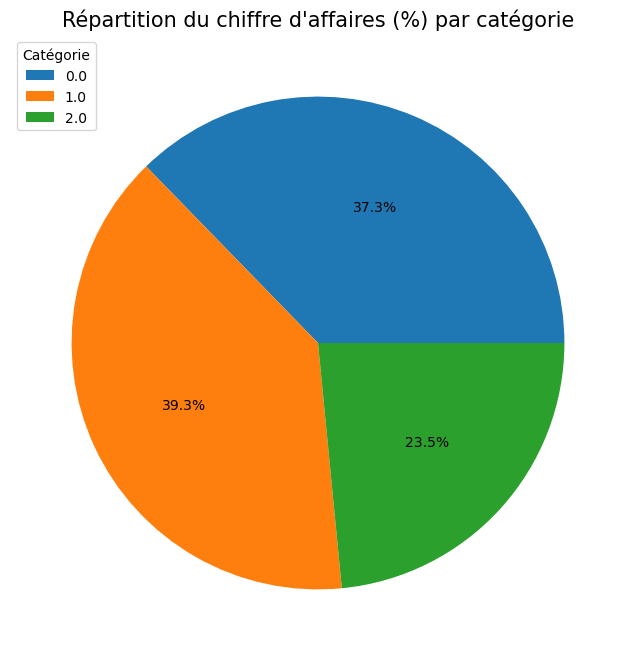

In [72]:
# Représentation graphique ciculaire de la répartition du chiffre d'affaires par catégories

plt.figure(figsize=(14,8))

plt.pie(data=ca_categ, x="chiffre_affaires", autopct="%1.1f%%")

plt.title("Répartition du chiffre d'affaires (%) par catégorie", fontsize=15)
plt.legend(ca_categ["categ"], title="Catégorie")

plt.show()

La répartition du chiffre d'affaires par catégorie nous indique que la catégorie 0 et 1 sont à peu près équivalentes avec respectivement 4,4 millions et 4,6 millions d'euros. Elles représentent 37 et 39 % du chiffre total soit un peu plus du tiers chacune.

En revanche la catégorie 2 est en retrait avec un chiffre d'affaires de 2,7 millions et représente 23,5 % soit moins du quart.

Nous avons vu précédemment que 7,3 % des produits vendus sont dans la catégorie 2, ce qui n'est pas une grande quantité. De ce fait le chiffre d'affaires générés par cette catégorie est honorable.

### - Répartition des clients par genre, dans une base de données clients

In [73]:
# Création d'une base clients uniques

bdd_client = data[["client_id", "sex", "birth"]].copy()

# Renommage des lignes

bdd_client["sex"] = bdd_client["sex"].replace("f", "Femme")
bdd_client["sex"] = bdd_client["sex"].replace("m", "Homme")

# Suppression des doublons

bdd_client.drop_duplicates(inplace=True)

# Regroupement des clients par sexe

client_sexe = bdd_client.groupby("sex")["client_id"].count().reset_index()
client_sexe = client_sexe.rename(columns={"sex":"genre", "client_id":"nombre_de_clients"})
client_sexe

,genre,nombre_de_clients
0,Femme,4491
1,Homme,4132


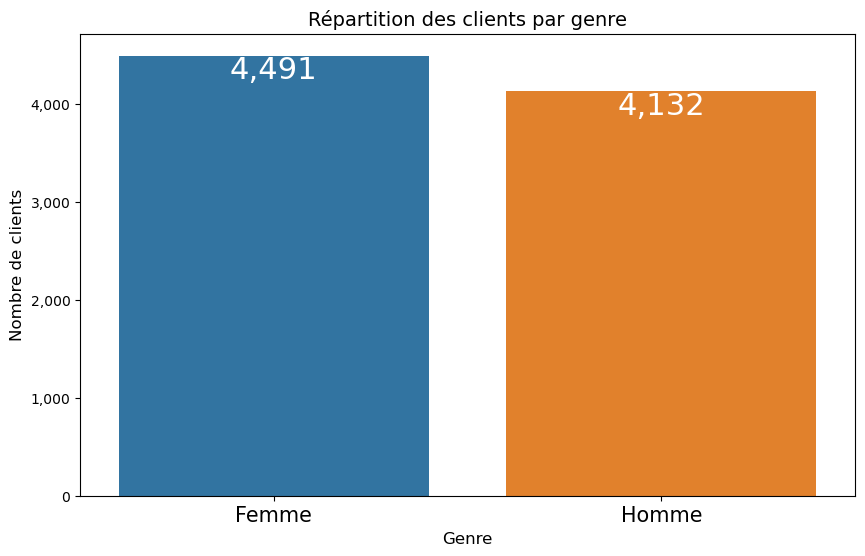

In [74]:
# Représentation graphique en barres

plt.figure(figsize=(10,6))

sns.barplot(x=client_sexe["genre"], y=client_sexe["nombre_de_clients"])
plt.title("Répartition des clients par genre", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Nombre de clients", fontsize=12)

# Séparateur des milliers sur l'axe des ordonnées
ax = plt.gca()
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.xticks(fontsize=15)

# Ajout des valeurs du nombre de clients sur chaque barre
for i, v in enumerate(client_sexe['nombre_de_clients']):
    plt.text(i, v, f"{v:,}", ha='center', va='top', color="w", fontsize=22)

plt.show()

La répartition des clients par genre est plutôt égalitaire avec 4 491 femmes et 4 132 hommes.

### - Répartition des clients par âge, dans une base de données clients

In [75]:
# Filtrage des années de naissance non nulles

client_age = bdd_client.loc[~data["birth"].isnull(),:].copy()
client_age["birth"] = client_age["birth"].astype("int")

# Ajout d'une colonne âge des clients

from datetime import datetime

client_age["age_client"] = client_age["birth"].apply(lambda x: (datetime.now().year - x))
client_age["age_client"].astype("int")
client_age

,client_id,sex,birth,age_client
0,c_6389,Femme,1991,32
246,c_8364,Homme,1973,50
355,c_3544,Femme,1967,56
507,c_1025,Homme,1984,39
770,c_2298,Homme,1972,51
...,...,...,...,...
679371,c_7584,Femme,1960,63
679372,c_90,Homme,2001,22
679373,c_587,Homme,1993,30
679374,ct_1,Homme,2001,22


Informations sur l'âge des clients :


count    8623.000000
mean       44.719123
std        16.919535
min        19.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        94.000000
Name: age_client, dtype: float64

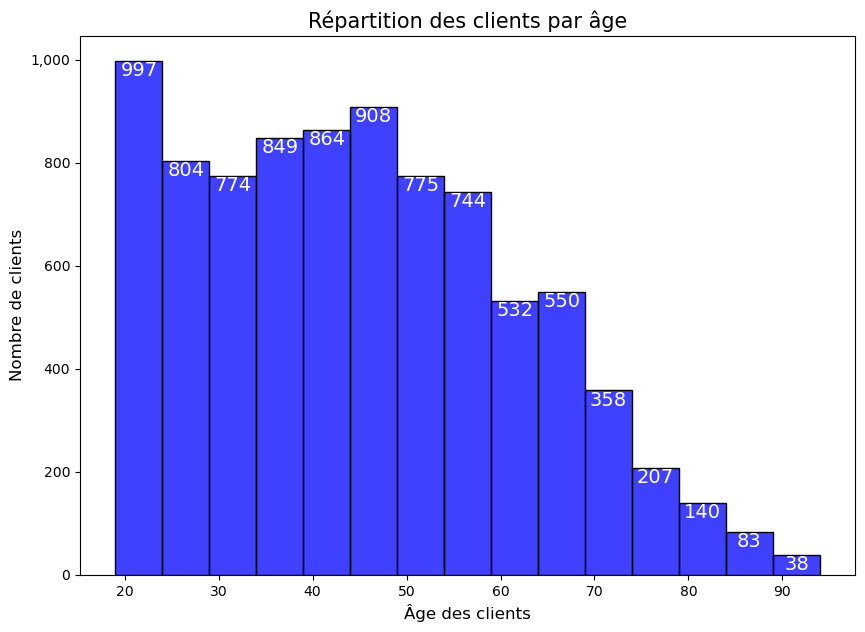

In [76]:
# Infos sur l'âge des clients

print("Informations sur l'âge des clients :")
display(client_age["age_client"].describe())

# Représentation graphique de la répartition des clients par âge

plt.figure(figsize=(10,7))
sns.histplot(data=client_age, x="age_client", color="b", binwidth=5)

# Récupération des barres et de leurs positions
bars = plt.gca().patches
x_coords = [bar.get_x() + bar.get_width()/2 for bar in bars]
y_coords = [bar.get_height() for bar in bars]

# Ajout des valeurs dans les barres
for x, y in zip(x_coords, y_coords):
    plt.text(x, y, f"{y}", ha='center', va='top', color="w", fontsize=14)

plt.title("Répartition des clients par âge", fontsize=15)
plt.xlabel("Âge des clients", fontsize=12)
plt.ylabel("Nombre de clients", fontsize=12)

# Séparateur des milliers sur l'axe des ordonnées
ax = plt.gca()
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)


plt.show()

### - Calcul du skewness empirique

Le skewness (γ ou gamma) est une mesure d'asymétrie de la distribution du chiffre d'affaires. Cela détermine vers quelle valeur tend l'histogramme.

Si γ = 0 alors la distribution est symétrique,

Si γ > 0 alors la distribution est étalée à droite.

Si γ < 0 alors la distribution est étalée à gauche.

In [77]:
# Calcul du skewness
round(client_age["age_client"].skew(),2)

0.36

Nous comptons 8623 clients dont la moyenne d'âge est de 44 ans avec un âge minimal de 19 ans contre un âge maximal de 94 ans.

L'âge médian est aussi de 44 ans, il sépare la population en 2, c'est à dire que nous avons autant de clients de moins de 44 ans que de clients de plus de 44 ans.

Le premier quart de la clientèle a entre 19 et 31 ans. Le 2ième quart entre 32 et 44 ans. Le 3ième quart entre 45 et 57 ans et enfin le dernier quart se situe entre 58 et 94 ans.

La mesure du skewness nous donne comme résultat 0,36, ce qui nous indique que la distribution est étalée à droite. En effet il y a plus de clients jeunes qu'âgés. Le nombre de clients diminue significativement à partir de 60 ans.

### - Répartition du chiffre d'affaires par clients

In [78]:
# Calcul de la répartition du chiffre d'affaires par clients

ca_client = data.groupby("client_id")["price"].sum().reset_index()
ca_client

,client_id,price
0,c_1,558.18
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2261.89
4,c_1001,1812.86
...,...,...
8618,c_997,1490.01
8619,c_998,2779.88
8620,c_999,701.40
8621,ct_0,0.00


### - Répartition du chiffre d'affaires par genre des clients

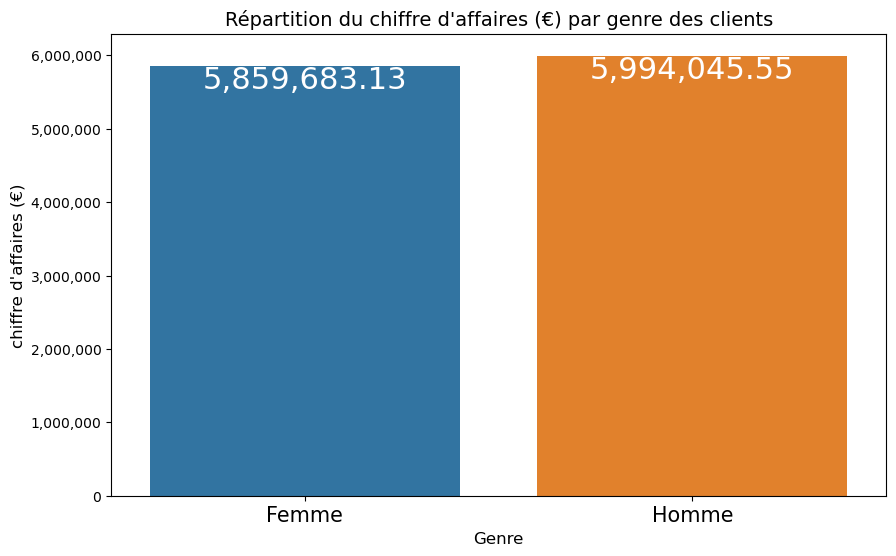

In [79]:
# Calcul de la répartition du chiffre d'affaires par genre des clients

ca_client_genre = data.groupby(["sex"])["price"].sum().reset_index()

# Renommage des lignes
ca_client_genre["sex"] = ca_client_genre["sex"].replace("f", "Femme")
ca_client_genre["sex"] = ca_client_genre["sex"].replace("m", "Homme")

# Représentation en graphique en barre

plt.figure(figsize=(10,6))

sns.barplot(x=ca_client_genre["sex"], y=ca_client_genre["price"])
plt.title("Répartition du chiffre d'affaires (€) par genre des clients", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("chiffre d'affaires (€)", fontsize=12)

# Séparateur des milliers sur l'axe des ordonnées
ax = plt.gca()
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.xticks(fontsize=15)

# Ajout des valeurs du nombre de clients sur chaque barre
for i, v in enumerate(ca_client_genre['price']):
    plt.text(i, v, f"{v:,}", ha='center', va='top', color="w", fontsize=22)

plt.show()

Ce graphique de la répartition du chiffre d'affaires par clients et par genre nous indique la quasi-égalité entre le chiffre généré par les hommes et les femmes.

La différence ne représente que 134 362,42 € soit + 2,29 % pour les hommes.

### - Répartition du chiffre d'affaires par âge des clients

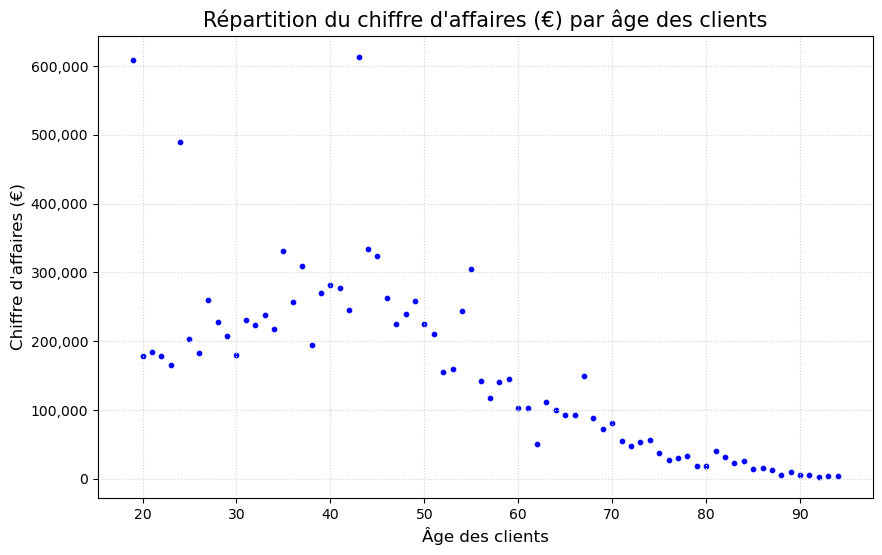

In [80]:
# Ajout d'une colonne âge des clients à la table data

ca_client_age = data[~data["birth"].isnull()].copy()
ca_client_age["age_client"] = ca_client_age["birth"].apply(lambda x: (datetime.now().year - x))
ca_client_age["age_client"].astype("int")
ca_client_age

# Calcul de la répartition du chiffre d'affaires par âge des clients

ca_client_age = ca_client_age.groupby(["age_client"])["price"].sum().reset_index()
ca_client_age

# Représentation graphique en nuage de points de la répartition du chiffre d'affaires par âge des clients

plt.figure(figsize=(10,6))

sns.scatterplot(data=ca_client_age, x="age_client", y="price", s=20, color="b")
plt.grid(linestyle="dotted", color="lightgray")
plt.xlabel("Âge des clients", fontsize=12)
plt.ylabel("Chiffre d'affaires (€)", fontsize=12)
plt.title("Répartition du chiffre d'affaires (€) par âge des clients", fontsize=15)

# Séparateur des milliers sur l'axe des ordonnées
ax = plt.gca()
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.show()

Ce graphique à nuage de points nous permet d'identifier la répartition du chiffre d'affaires en fonction de l'âge des clients.

La tendance générale indique que les clients à partir de 19 ans et jusqu'à environ 50 ans effectuent des achats de plus en plus chers avec l'âge croissant. C'est entre 35 et 50 ans que nos clients génèrent le plus de chiffre d'affaires.

À partir de 50 ans et plus et jusqu'à 94 ans, les achats vont en diminuant progressivement.

Nous noterons la présence de valeurs extrêmes identifiées par 3 points aux alentours des 500 000 et 600 000 €. Nous allons identifier les raisons de ces augmentations de chiffre d'affaires qui sortent de la moyenne.

### - Clients réalisant la plus grosse part de chiffre d'affaires

In [81]:
# Identification des clients réalisant la plus grosse part du chiffre d'affaires

ca_client_max = ca_client.sort_values(by="price", ascending=False)
ca_client_max.head(10)

,client_id,price
678,c_1609,324033.35
4398,c_4958,289760.34
6350,c_6714,153598.92
2728,c_3454,113637.93
2516,c_3263,5276.87
635,c_1570,5271.62
2110,c_2899,5214.05
1269,c_2140,5208.82
7022,c_7319,5155.77
7732,c_7959,5085.45


La plus grosse part du chiffre d'affaires est réalisé par 4 clients sous les références c_1609, c_4958, c_6714 et c_3454.

Il s'agit probablement de clients professionnels ou institutionnels qui achètent en gros pour des librairies ou des bibliothèques. Nous les catégorisons en tant que clients business to business (B to B).

In [82]:
# Représentation graphique des gros clients versus le reste des clients

liste_gros_client = ["c_1609", "c_4958", "c_6714", "c_3454"]

# Séparation en 2 tableaux regroupant d'un côté les gros clients et de l'autre le reste des clients
ca_gros_client = ca_client_max[ca_client_max["client_id"].isin(liste_gros_client)]
ca_autre_client = ca_client_max[~ca_client_max["client_id"].isin(liste_gros_client)]

# Regroupement du reste des clients en une seule ligne
total_ca_autre_client = ca_autre_client["price"].sum()
total_ca_autre_client_df = pd.DataFrame([("Autres clients", total_ca_autre_client)], columns=["client_id", "price"])

# Création nouveau dataframe
ca_gros_client_vs = pd.concat([ca_gros_client, total_ca_autre_client_df]).reset_index()

ca_gros_client_vs

,index,client_id,price
0,678,c_1609,324033.35
1,4398,c_4958,289760.34
2,6350,c_6714,153598.92
3,2728,c_3454,113637.93
4,0,Autres clients,10972698.14


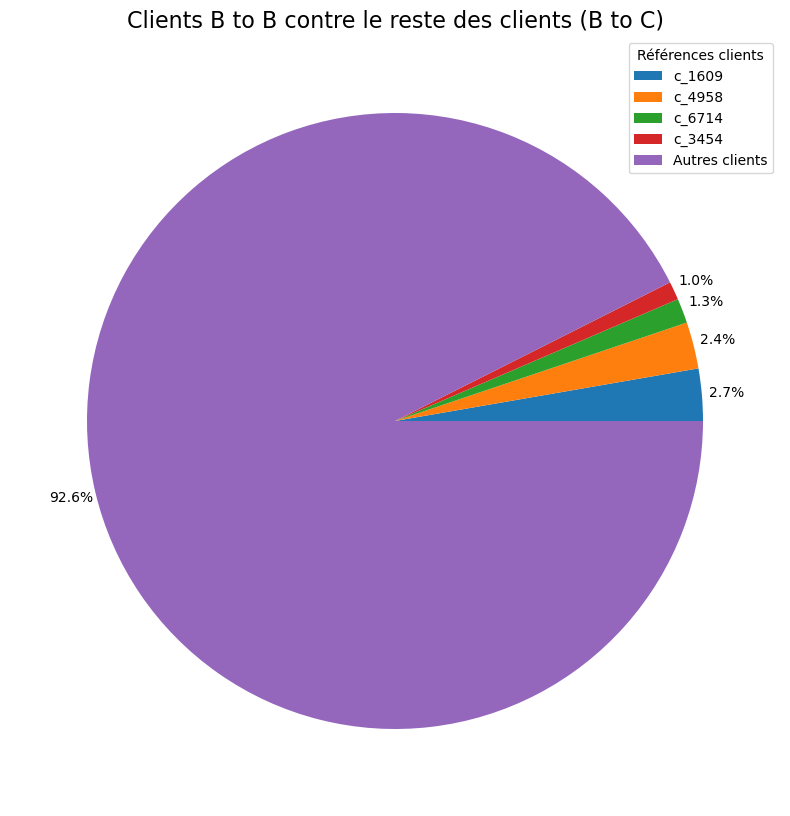

In [83]:
# Représentation graphique des clients réalisant la plus grosse part du chiffre d'affaires contre le reste des clients

plt.figure(figsize=(18,10))

plt.pie(data=ca_gros_client_vs, x="price", autopct='%1.1f%%', pctdistance=1.08)

plt.title("Clients B to B contre le reste des clients (B to C)", fontsize=16)
plt.legend(ca_gros_client_vs["client_id"], title="Références clients")

plt.show()

In [84]:
# Identification des clients réalisant la plus petite part du chiffre d'affaires

ca_client_min = ca_client.sort_values(by="price")
ca_client_min.head(50)

,client_id,price
8622,ct_1,0.00
8621,ct_0,0.00
2808,c_3526,0.00
8511,c_90,0.00
2716,c_3443,0.00
3831,c_4447,0.00
3786,c_4406,0.00
4694,c_5223,0.00
7316,c_7584,0.00
3099,c_3789,0.00


Il existe des clients enregistrés dans la base de données n'ayant pas encore réalisés d'achats ou pour des montants peu élevés.

Une relance clients ou des offres adaptées à leur profil pourraient stimuler leur envie d'achat.

### - Courbe de Lorenz de la répartition du chiffre d'affaires par clients

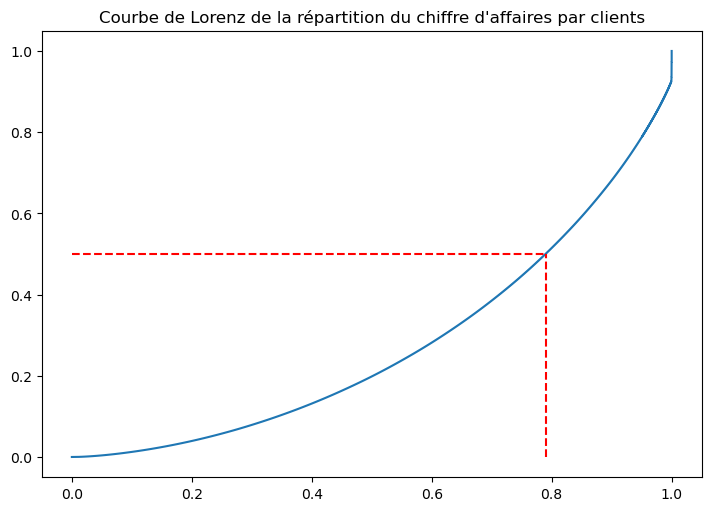

In [85]:
# Courbe de Lorenz

figure = plt.figure(layout="constrained", figsize=(7,5))
ca_lorenz = ca_client["price"].values
n = len(ca_lorenz)
lorenz = np.cumsum(np.sort(ca_lorenz)) / ca_lorenz.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.title("Courbe de Lorenz de la répartition du chiffre d'affaires par clients")

# Représentation de la médiale
plt.plot([0,0.79], [0.5,0.5], "r--")
plt.plot([0.79,0.79], [0,0.5], "r--")

plt.show()

Nous constatons qu'environ 79 % des clients génèrent la moitié du chiffre d'affaires.

Les 21 % des clients restants représentent la seconde moitié du chiffre d'affaires.

Nous notons un pic vers la fin de la courbe, ce qui veut dire qu'un petit nombre de client réalise la plus grosse part du chiffre d'affaires. Nous les avons identifié plus haut, ils sont au nombre de 4.

### - Calcul de l'indice de Gini

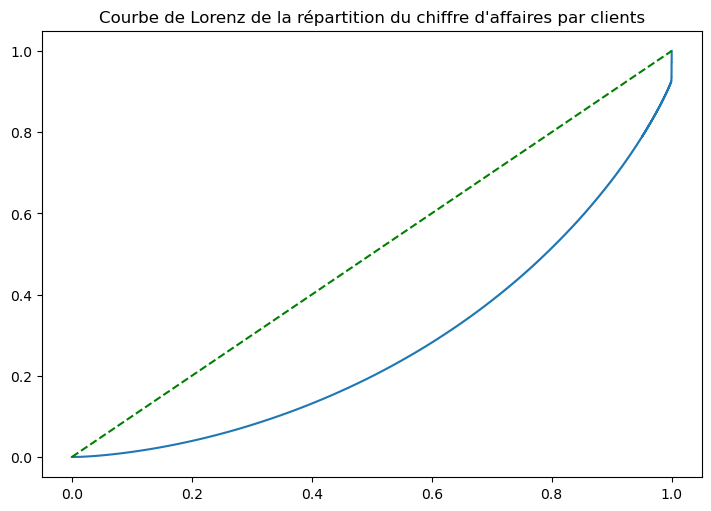

L'indice de Gini représente 0.45


In [86]:
figure = plt.figure(layout="constrained", figsize=(7,5))
ca_lorenz = ca_client["price"].values
n = len(ca_lorenz)
lorenz = np.cumsum(np.sort(ca_lorenz)) / ca_lorenz.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.title("Courbe de Lorenz de la répartition du chiffre d'affaires par clients")

# Représentation de la première bissectrice
plt.plot([0,1], [0,1], "g--")

plt.show()

# Indice de Gini
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print("L'indice de Gini représente", round(gini, 2))

Avec une valeur de 0.45, l'indice de Gini est plus proche de 0 que de 1.

Cela exprime une répartition plutôt égalitaire du chiffre d'affaires par clients si on les compte dans la majorité, sans tenir compte du gap haussier que représentent les 4 clients professionnels.

# II) Demandes de Julie

### A) Lien entre le genre d'un client et les catégories des livres achetés
(cas de 2 variables qualitatives)

**Problématique :**

Y a-t-il un lien entre les catégories des produits vendus et le genre du client ?

**Hypothèses :**

H0 : Les catégories des produits vendus et le genre du client sont indépendants.

H1 : Les catégories des produits vendus et le genre du client sont corrélés.

In [87]:
# Filtrage des données clients B to C en excluant les clients B to B pour le tableau de contingence et le calcul du Khi²

data_b_to_c = data[~data["client_id"].isin(liste_gros_client)]
data_btoc_ca = data_b_to_c.groupby("client_id")["price"].sum().reset_index()
data_btoc_ca.sort_values(by="price", ascending=False)

,client_id,price
2515,c_3263,5276.87
635,c_1570,5271.62
2109,c_2899,5214.05
1268,c_2140,5208.82
7018,c_7319,5155.77
...,...,...
3784,c_4406,0.00
3730,c_4358,0.00
8507,c_90,0.00
250,c_1223,0.00


### - Tableau de contingence et calcul du Khi²

In [88]:
# Tableau de contingence des catégories et genres

X = "sex"
Y = "categ"

df_contingence_categ_genre = data_b_to_c[[X,Y]].pivot_table(index=X, columns=Y, aggfunc=len, margins=True, margins_name="Total")
df_contingence_categ_genre = df_contingence_categ_genre.rename(index={"f":"Femme", "m":"Homme"})

print("Tableau de contingence des catégories et genres :")
display(df_contingence_categ_genre)

# Calcul du Khi² dans le cadre de 2 variables qualitatives

from scipy.stats import chi2_contingency

# Récupération des valeurs de la table de contingence
contingence_categ_genre = df_contingence_categ_genre.values

# Test du chi-deux
stat, p, dof, expected = chi2_contingency(contingence_categ_genre)

# Affichage des valeurs théoriques dans le cas où les variables catégorie et genre sont indépendantes 
df_expected = pd.DataFrame(expected, columns=df_contingence_categ_genre.columns, index=df_contingence_categ_genre.index)

print("\nTableau des valeurs théoriques dans le cas d'indépendance des variables catégorie et genre :")
display(df_expected)

# Calcul des écarts au carré pour afficher le tableau du Khi²
df_chi2 = (df_contingence_categ_genre - df_expected)**2 / df_expected

print("\nTableau du Khi² des écarts au carré entre le tableau de contingence et le tableau théorique dans le cas d'indépendance :")
display(df_chi2)

# Degré de liberté égal à (nbLignes - 1)*(nbColonnes - 1). Il exprime le fait que l'on peut trouver une valeur manquante si on connait les autres valeurs et leur total
print("\nDegré de liberté :", dof)

# P valeur qui mesure la probabilité que les résultats soient dûs au hasard lorsque l'hypothèse nulle (H0) est vraie
print("\nMesure de probabilité P-valeur :", p)

Tableau de contingence des catégories et genres :


categ,0.0,1.0,2.0,Total
sex,,,,
Femme,200793,111331,16980,329104
Homme,186488,101017,15868,303373
Total,387281,212348,32848,632477



Tableau des valeurs théoriques dans le cas d'indépendance des variables catégorie et genre :


categ,0.0,1.0,2.0,Total
sex,,,,
Femme,201518.357543,110493.466469,17092.175987,329104.0
Homme,185762.642457,101854.533531,15755.824013,303373.0
Total,387281.000000,212348.000000,32848.000000,632477.0



Tableau du Khi² des écarts au carré entre le tableau de contingence et le tableau théorique dans le cas d'indépendance :


categ,0.0,1.0,2.0,Total
sex,,,,
Femme,2.610896,6.348452,0.736211,0.0
Homme,2.832343,6.886904,0.798654,0.0
Total,0.000000,0.000000,0.000000,0.0



Degré de liberté : 6

Mesure de probabilité P-valeur : 0.0025371819244419495


Nous prenons un seuil de risque de 5 %, soit alpha = 0.05, pour le comparer à la P-valeur et déterminer si nous rejetons ou non l'hypothèse nulle (H0).

Alpha est le seuil de probabilité à partir duquel on peut considérer que les résultats observés ne sont pas dus au hasard, donc ils sont statistiquement significatifs. Si la p-value est inférieure à alpha, on peut rejeter l'hypothèse nulle et affirmer qu'il existe une différence ou un effet significatif. Si la p-value est supérieure à alpha, on ne peut pas rejeter l'hypothèse nulle et affirmer qu'il n'existe pas de différence ou d'effet significatif.

In [89]:
# Interprétation des résultats
alpha = 0.05
if p <= alpha:
    print(f'Les variables sont associées (p={p:.8f})')
else:
    print(f'Les variables ne sont pas associées (p={p:.8f})')

Les variables sont associées (p=0.00253718)


### - Heatmap de corrélation des catégories de produits vendus et du genre des clients

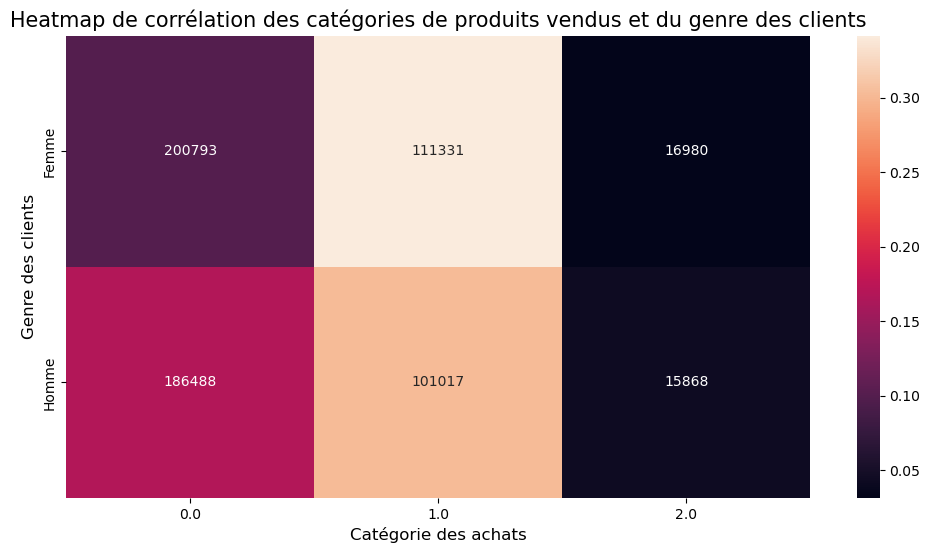

In [148]:
# Heatmap de non-indépendance des valeurs à partir du tableau de contingence

tx = df_contingence_categ_genre.loc[:,["Total"]]
ty = df_contingence_categ_genre.loc[["Total"],:]
n = len(data_b_to_c)
indep = tx.dot(ty) / n

c = df_contingence_categ_genre.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n

plt.figure(figsize=(12,6))
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], fmt="d")
plt.title("Heatmap de corrélation des catégories de produits vendus et du genre des clients", fontsize=15)
plt.xlabel("Catégorie des achats", fontsize=12)
plt.ylabel("Genre des clients", fontsize=12)
plt.show()

La représentation graphique de la carte des chaleurs de la dépendance des catégories de produits vendus et du genre des clients B to C, affiche la puissance de dépendance entre ces 2 variables. Plus la couleur est foncée, plus la dépendance est forte.

Nous constatons une forte corrélation entre hommes et femmes pour l'achat de produits de catégorie 2 et elle diminue progressivement pour les catégories 1 et 0 dans des moindres mesures. La corrélation reste néanmoins très forte comme en témoigne le graphique suivant.

Table du chiffre d'affaires par catégorie de produits et genre des clients :


,categ,sex,price
0,0.0,f,2132758.48
1,0.0,m,1986442.21
2,1.0,f,2285170.48
3,1.0,m,2064262.51
4,2.0,f,1288155.25
5,2.0,m,1215909.21


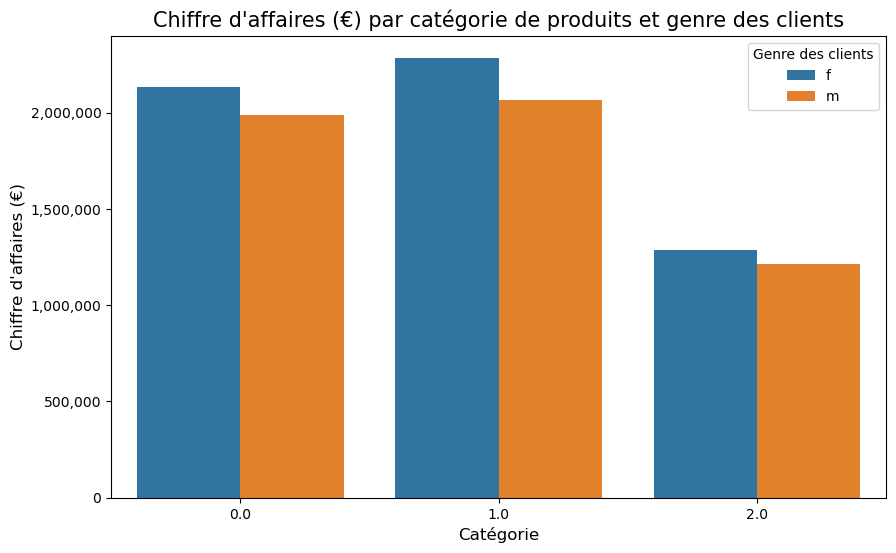

In [91]:
# Représentation graphique du chiffre d'affaires par catégorie de produits et genre des clients

data_b_to_c_ca = data_b_to_c.groupby(["categ", "sex"])["price"].sum().reset_index()
print("Table du chiffre d'affaires par catégorie de produits et genre des clients :")
display(data_b_to_c_ca)

plt.figure(figsize=(10,6))

sns.barplot(data=data_b_to_c_ca, x="categ", y="price", hue="sex")

plt.title("Chiffre d'affaires (€) par catégorie de produits et genre des clients", fontsize=15)
plt.xlabel("Catégorie", fontsize=12)
plt.ylabel("Chiffre d'affaires (€)", fontsize=12)
plt.legend(title="Genre des clients")

# Séparateur des milliers sur l'axe des ordonnées
ax = plt.gca()
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.show()

Ce graphique en barre du chiffre d'affaires par catégorie de produits et genre des clients, nous montre clairement la corrélation entre les hommes et les femmes dans chaque catégorie.

### B) Lien entre l’âge des clients et le montant total des achats
( cas de 2 variables quantitatives)

**Problématique :**

Y a-t-il un lien entre l'âge des clients et le montant total des achats ?

**Hypothèses :**

H0 : L'âge des clients et le montant total des achats ne sont pas corrélés.

H1 : L'âge des clients et le montant total des achats sont corrélés.

**Seuil de vérification à 5 %** qui permet ou non de rejeter l'hypothèse nulle.

In [92]:
# Ajout d'une colonne âge des clients à la table data

df_age_montant = data_b_to_c[~data_b_to_c["birth"].isnull()].copy()
df_age_montant["age_client"] = df_age_montant["birth"].apply(lambda x: (datetime.now().year - x))
df_age_montant["age_client"].astype("int")
df_age_montant["quantité_transactions"] = 1

# Regroupement du montant total des achats par âge des clients

df_age_montant_total = df_age_montant.groupby("age_client")[["price", "quantité_transactions"]].sum().reset_index()
print("Table du montant total des achats par âge des clients et leur nombre de transactions :")
df_age_montant_total.head(10)

Table du montant total des achats par âge des clients et leur nombre de transactions :


,age_client,price,quantité_transactions
0,19.0,609013.69,15152
1,20.0,178195.78,4372
2,21.0,184177.35,4588
3,22.0,178497.70,4256
4,23.0,165007.98,4415
5,24.0,199737.20,5047
6,25.0,203545.80,4841
7,26.0,182916.76,4759
8,27.0,259425.12,6028
9,28.0,227322.93,5668


### - Test de normalité de Shapiro-Wilk qui vérifie si les données sont normalement distribuées

In [93]:

# Sur l'âge des clients

w, p = st.shapiro(df_age_montant_total["age_client"])
print("P-valeur pour l'échantillon age_client :",p)

# Si p > 0.05, on peut conclure que l'échantillon est normalement distribué
if p > 0.05:
    print("l'échantillon age_client est normalement distribué.")
else:
    print("l'échantillon age_client n'est pas normalement distribué.\n")

# Sur le montant total des achats

w, p = st.shapiro(df_age_montant_total["price"])
print("P-valeur pour l'échantillon montant total des achats :", p)

# Si p > 0.05, on peut conclure que l'échantillon est normalement distribué
if p > 0.05:
    print("l'échantillon montant total des achats est normalement distribué.")
else:
    print("l'échantillon montant total des achats n'est pas normalement distribué.")

P-valeur pour l'échantillon age_client : 0.008753503672778606
l'échantillon age_client n'est pas normalement distribué.

P-valeur pour l'échantillon montant total des achats : 6.0168702475493774e-05
l'échantillon montant total des achats n'est pas normalement distribué.


### - Représentation graphique de la distribution des 2 variables âge client et montant total des achats

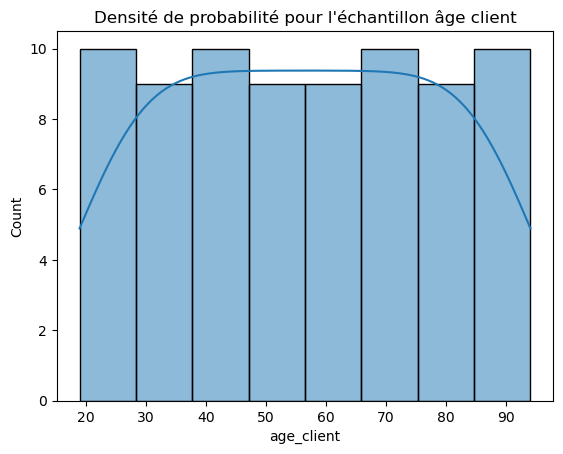

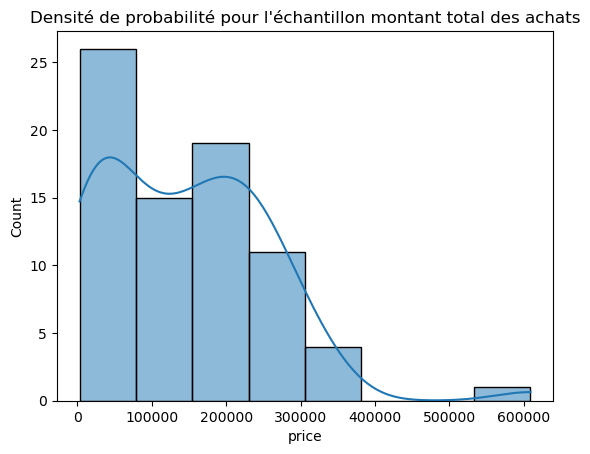

In [94]:
# Diagramme de densité de probabilité pour l'échantillon age_client
sns.histplot(df_age_montant_total["age_client"], kde=True)
plt.title("Densité de probabilité pour l'échantillon âge client")
plt.show()

# Diagramme de densité de probabilité pour l'échantillon montant total des achats
sns.histplot(df_age_montant_total["price"], kde=True)
plt.title("Densité de probabilité pour l'échantillon montant total des achats")
plt.show()

### - Test de Mann-Whitney dans le cadre de 2 variables quantitatives qui ne respectent pas une distribution normale

In [95]:
# Test de Mann-Whitney pour vérifier si les médianes des deux échantillons sont significativement différentes

from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(df_age_montant_total["age_client"], df_age_montant_total["price"])
print("stat :", stat, "\np-value :", p)

# Si p < 0.05, on peut rejeter l'hypothèse nulle selon laquelle les médianes des deux échantillons sont égales
if p < 0.05:
    print("Les médianes des deux échantillons sont significativement différentes.")
else:
    print("Les médianes des deux échantillons ne sont pas significativement différentes.")


stat : 0.0 
p-value : 1.935340332639732e-26
Les médianes des deux échantillons sont significativement différentes.


Grâce aux test de normalité de Shapiro-Wilk nous constatons que les données ne respectent pas une distribution normale.

Dans ce cas nous utilisons le test de Mann-Whitney et nous observons que les médianes des deux échantillons sont significativement différentes.

### - Test de Spearman

Le test de Spearman est un test statistique utilisé pour tester l'existence d'une corrélation monotone (c'est-à-dire croissante ou décroissante) entre deux variables quantitatives. Il mesure la force et la direction de la relation entre les deux variables en utilisant le coefficient de corrélation de Spearman (rho). Ce coefficient varie entre -1 et 1, où -1 indique une corrélation négative parfaite, 0 indique aucune corrélation et 1 indique une corrélation positive parfaite.

Il est utilisé lorsque les données ne suivent pas une distribution normale ou lorsque les variables sont ordinales, comme l'âge des clients, ou en présence de valeurs outliers.

In [96]:
from scipy.stats import spearmanr

# Récupération des données pour les colonnes "x" et "y"
x = df_age_montant_total["age_client"]
y = df_age_montant_total["price"]

# Test de Spearman
rho, p = spearmanr(x, y)
print(f"rho = {rho:.3f}, p = {p:.3f}")

# Si p < 0.05, on peut rejeter l'hypothèse nulle selon laquelle il n'y a pas de corrélation monotone entre les variables
if p < 0.05:
    print("Il y a une corrélation monotone entre les variables.")
else:
    print("Il n'y a pas de corrélation monotone entre les variables.")

rho = -0.874, p = 0.000
Il y a une corrélation monotone entre les variables.


Le coefficient de corrélation monotone Rho est égal à -0.874. Il est proche de - 1, ce qui implique une corrélation négative entre l'âge des clients et le montant total des achats.

Autrement dit, plus les clients vieillissent moins le montant de leurs achats est élevé. 

### - Test de pearson

In [97]:
from scipy.stats import pearsonr

# Récupération des données pour les colonnes age_client et price
x = df_age_montant_total["age_client"]
y = df_age_montant_total["price"]

# Test de Pearson
r, p = pearsonr(x, y)
print(f"r = {r:.3f}, p = {p:.3f}")

# Si p < 0.05, on peut rejeter l'hypothèse nulle selon laquelle il n'y a pas de corrélation linéaire entre les variables
if p < 0.05:
    print("Il y a une corrélation linéaire entre les variables.")
else:
    print("Il n'y a pas de corrélation linéaire entre les variables.")


r = -0.831, p = 0.000
Il y a une corrélation linéaire entre les variables.


Le test de pearson qui est un test paramétrique, c'est à dire plus poussé et plus robuste, nous indique une corrélation négative de -0.831 entre l'âge des clients et le montant total des achats qui va dans le même sens que la réponse du test précédent.

### - Représentation graphique entre l'âge des clients et le montant total des achats

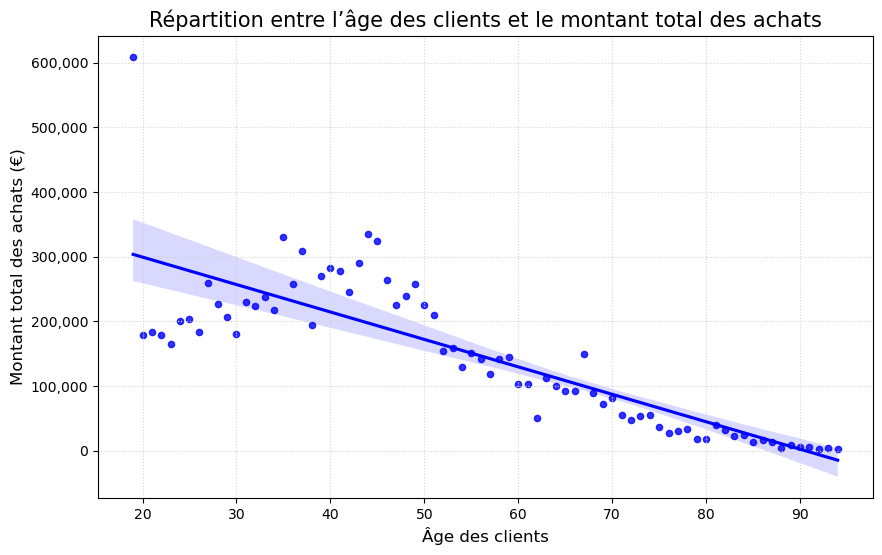

Rappel des plus gros montants des achats par âge des clients :


,age_client,price,quantité_transactions
0,19.0,609013.69,15152


In [98]:
# Représentation graphique en nuage de points des 2 variables
plt.figure(figsize=(10,6))

sns.regplot(data=df_age_montant_total, x="age_client", y="price", scatter_kws={"s":20}, color="b")
plt.grid(linestyle="dotted", color="lightgray")
plt.xlabel("Âge des clients", fontsize=12)
plt.ylabel("Montant total des achats (€)", fontsize=12)
plt.title("Répartition entre l’âge des clients et le montant total des achats", fontsize=15)

# Séparateur des milliers sur l'axe des ordonnées
ax = plt.gca()
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.show()

print("Rappel des plus gros montants des achats par âge des clients :")
display(df_age_montant_total.loc[df_age_montant_total["price"] > 600000,:])

### - Coefficient de corrélation entre l'âge des clients et le montant total des achats

In [99]:
# Coefficient de Pearson

coeff_corr = st.pearsonr(df_age_montant_total["age_client"],df_age_montant_total["price"])[0]
print("Le coefficient de corrélation représente", coeff_corr)

Le coefficient de corrélation représente -0.8306553438502089


Ce graphique à nuage de points nous permet d'identifier la répartition du chiffre d'affaires en fonction de l'âge des clients.

La tendance générale indique que les clients à partir de 19 ans et jusqu'à environ 50 ans effectuent des achats de plus en plus chers avec l'âge croissant. C'est entre 35 et 50 ans que nos clients génèrent le plus de chiffre d'affaires.

À partir de 50 ans et plus et jusqu'à 94 ans, les achats vont en diminuant progressivement.

**La droite de régression linéaire, qui donne la tendance générale de tous les points, est descendante comme en atteste son coefficient négatif de - 0.83 qui est proche de -1. Cela veut dire que le montant total des achats évolue à l'inverse du vieillissement des clients. Autrement dit, les clients plus jeunes dépensent plus que les plus anciens.**

Nous noterons la présence de valeurs extrêmes identifiées par le point supérieur à 600 000 € pour les clients de 19 ans. Cela peut correspondre au fait qu'à la création d'un nouveau compte client, au moment de la transaction, l'âge renseigné soit systématiquement la première valeur proposée ou soit un oubli par le client et reste donc comme valeur par défaut.

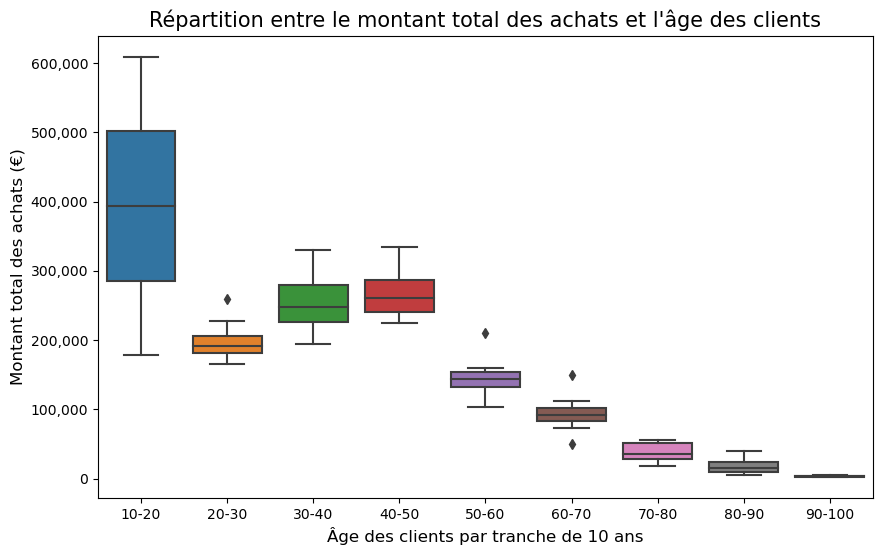

Table du montant total des achats pour les clients de 19 et 20 ans :


,age_client,price,quantité_transactions,age_group
0,19.0,609013.69,15152,10-20
1,20.0,178195.78,4372,10-20


In [100]:
# discrétisation de l'âge des clients en tranches de 10 ans
df_age_montant_total["age_group"] = pd.cut(df_age_montant_total["age_client"], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=["10-20","20-30","30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100"])

# Représentation graphique en boîtes entre l'âge des clients (tranche de 10 ans) et le montant total des achats

plt.figure(figsize=(10,6))

sns.boxplot(data=df_age_montant_total, x="age_group", y="price")

plt.xlabel("Âge des clients par tranche de 10 ans", fontsize=12)
plt.ylabel("Montant total des achats (€)", fontsize=12)
plt.title("Répartition entre le montant total des achats et l'âge des clients", fontsize=15)

# Séparateur des milliers sur l'axe des ordonnées
ax = plt.gca()
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.show()

print("Table du montant total des achats pour les clients de 19 et 20 ans :")
df_age_montant_total.loc[df_age_montant_total["age_client"]<=20,:]

La représentation graphique en boîtes par tranche d'âge de 10 ans permet de visualiser l'étalement du montant total des achats par âge dans la tranche définie.

La première boîte représente les 19-20 ans et semble très étalée du fait de l'achat important des clients de 19 ans (explication probable précédemment) avec un montant de 609 013 € contre les clients de 20 ans avec un montant de 178 195 €.

Les autres boîtes présentent une répartition équilibrée.

### - Distribution du montant total des achats par clients et par âge

In [101]:
# Ajout d'une colonne âge des clients à la table data

df_age_montant = data_b_to_c[~data_b_to_c["birth"].isnull()].copy()
df_age_montant["age_client"] = df_age_montant["birth"].apply(lambda x: (datetime.now().year - x))
df_age_montant["age_client"].astype("int")
df_age_montant["quantité_transactions"] = 1

# Regroupement du montant total des achats par clients et leur âge

df_age_montant_total_c = df_age_montant.groupby(["client_id", "age_client"])[["price", "quantité_transactions"]].sum().reset_index()
df_age_montant_total_c = df_age_montant_total_c.rename(columns={"price":"montant_total"})

print("Table du montant total des achats par clients et leur âge et nombre de transactions :")
display(df_age_montant_total_c.head())

Table du montant total des achats par clients et leur âge et nombre de transactions :


,client_id,age_client,montant_total,quantité_transactions
0,c_1,68.0,558.18,39
1,c_10,67.0,1353.60,58
2,c_100,31.0,254.85,8
3,c_1000,57.0,2261.89,125
4,c_1001,41.0,1812.86,102


### - Représentation graphique entre l'âge des clients et le montant total des achats

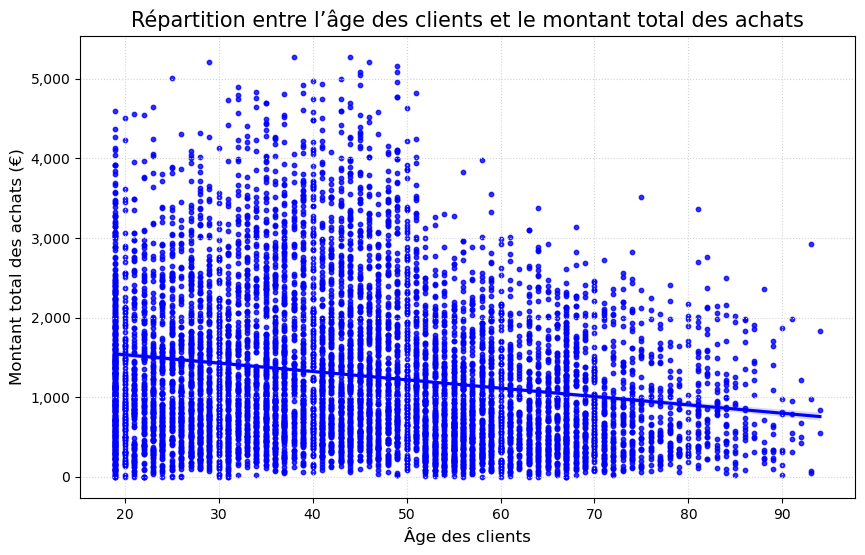

In [102]:
# Représentation graphique en nuage de points des 2 variables
plt.figure(figsize=(10,6))

sns.regplot(data=df_age_montant_total_c, x="age_client", y="montant_total", scatter_kws={"s":10}, color="b")
plt.grid(linestyle="dotted", color="lightgray")
plt.xlabel("Âge des clients", fontsize=12)
plt.ylabel("Montant total des achats (€)", fontsize=12)
plt.title("Répartition entre l’âge des clients et le montant total des achats", fontsize=15)

# Séparateur des milliers sur l'axe des ordonnées
ax = plt.gca()
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.show()

### - Coefficient de corrélation entre l'âge des clients et le montant total des achats

In [103]:
# Coefficient de Pearson

coeff_corr = st.pearsonr(df_age_montant_total["age_client"],df_age_montant_total["price"])[0]
print("Le coefficient de corrélation représente", coeff_corr)

Le coefficient de corrélation représente -0.8306553438502089


Ce graphique à nuage de points nous permet d'identifier la répartition du chiffre d'affaires en fonction des clients et de leur âge.

Il s'agit d'une version éclatée du chiffre d'affaire généré entre tous ses clients.

**La droite de régression linéaire, qui donne la tendance générale de tous les points, est descendante comme en atteste son coefficient négatif de -0.83 qui est proche de -1. Cela veut dire que le montant total des achats évolue à l'inverse du vieillissement des clients. Autrement dit, les clients plus jeunes dépensent plus que les plus anciens.**

### C) Lien entre l'âge des clients et la fréquence d'achat
(Cas de 2 variables quantitatives)

**Problématique :**

Y a-t-il un lien entre l'âge des clients et la fréquence d'achats ?

**Hypothèses :**

H0 : L'âge des clients et la fréquence des achats ne sont pas corrélés.

H1 : L'âge des clients et la fréquence des achats sont corrélés.

**Seuil de vérification à 5 %** qui permet ou non de rejeter l'hypothèse nulle.

In [104]:
# Récupération de la table df_age_montant_total avec le nombre d'achats

df_age_freq = df_age_montant_total.copy()
df_age_freq = df_age_freq[["age_group", "age_client", "quantité_transactions"]]

# Ajout de la colonne fréquence d'achats

quantité_transactions_total = df_age_freq["quantité_transactions"].sum()
df_age_freq["fréquence_achats_%"] = round((df_age_freq["quantité_transactions"] / quantité_transactions_total * 100),2)

print("Table de l'âge des clients avec leur fréquence d'achats :")
display(df_age_freq)

# Table de l'âge des clients discrétisé par tranche de 10 ans avec la fréquence des achats

df_age_group_freq = df_age_freq.groupby("age_group")[["quantité_transactions", "fréquence_achats_%"]].sum().reset_index()
print("Table de l'âge des clients par tranche de 10 ans avec leur fréquence d'achats :")
df_age_group_freq

Table de l'âge des clients avec leur fréquence d'achats :


,age_group,age_client,quantité_transactions,fréquence_achats_%
0,10-20,19.0,15152,2.39
1,10-20,20.0,4372,0.69
2,20-30,21.0,4588,0.73
3,20-30,22.0,4256,0.67
4,20-30,23.0,4415,0.70
...,...,...,...,...
71,80-90,90.0,327,0.05
72,90-100,91.0,311,0.05
73,90-100,92.0,170,0.03
74,90-100,93.0,226,0.04


Table de l'âge des clients par tranche de 10 ans avec leur fréquence d'achats :


,age_group,quantité_transactions,fréquence_achats_%
0,10-20,19524,3.08
1,20-30,49335,7.81
2,30-40,181446,28.67
3,40-50,202277,31.96
4,50-60,89964,14.21
5,60-70,55957,8.85
6,70-80,22526,3.56
7,80-90,10775,1.70
8,90-100,908,0.15


### - Test de normalité de Shapiro-Wilk qui vérifie si les données sont normalement distribuées

In [105]:
# Sur l'âge des clients

print("Comme vu précédemment, l'échantillon âge des clients n'est pas normalement distribué.\n")

# Sur la fréquence d'achats

w, p = st.shapiro(df_age_freq["fréquence_achats_%"])
print("P-valeur pour l'échantillon fréquence d'achats :", p)

# Si p > 0.05, on peut conclure que l'échantillon est normalement distribué
if p > 0.05:
    print("l'échantillon fréquence d'achats est normalement distribué.")
else:
    print("l'échantillon fréquence d'achats n'est pas normalement distribué.")

Comme vu précédemment, l'échantillon âge des clients n'est pas normalement distribué.

P-valeur pour l'échantillon fréquence d'achats : 4.842314069719578e-07
l'échantillon fréquence d'achats n'est pas normalement distribué.


### - Représentation graphique de la distribution de la variable fréquence d'achats

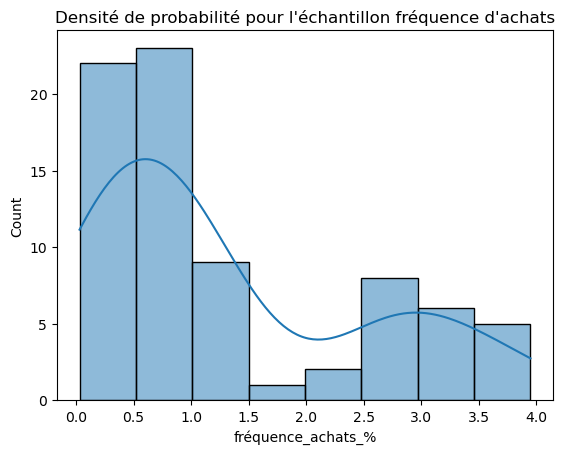

In [106]:
# Diagramme de densité de probabilité pour l'échantillon fréquence d'achats
sns.histplot(df_age_freq["fréquence_achats_%"], kde=True)
plt.title("Densité de probabilité pour l'échantillon fréquence d'achats")
plt.show()

### - Test de Mann-Whitney dans le cadre de 2 variables quantitatives qui ne respectent pas une distribution normale

In [107]:
# Test de Mann-Whitney pour vérifier si les médianes des deux échantillons sont significativement différentes

stat, p = mannwhitneyu(df_age_freq["age_client"], df_age_freq["fréquence_achats_%"])
print("Stat :", stat, "\nP-valeur :", p)

# Si p < 0.05, on peut rejeter l'hypothèse nulle selon laquelle les médianes des deux échantillons sont égales
if p < 0.05:
    print("Les médianes des deux échantillons sont significativement différentes.")
else:
    print("Les médianes des deux échantillons ne sont pas significativement différentes.")


Stat : 5776.0 
P-valeur : 1.9336417506247254e-26
Les médianes des deux échantillons sont significativement différentes.


Grâce aux test de normalité de Shapiro-Wilk nous constatons que les données ne respectent pas une distribution normale.

Dans ce cas nous utilisons le test de Mann-Whitney et nous observons que les médianes des deux échantillons sont significativement différentes.

### - Test de Spearman

In [108]:
from scipy.stats import spearmanr

# Récupération des données pour les colonnes "x" et "y"
x = df_age_freq["age_client"]
y = df_age_freq["fréquence_achats_%"]

# Test de Spearman
rho, p = spearmanr(x, y)
print(f"rho = {rho:.3f}, p = {p:.3f}")

# Si p < 0.05, on peut rejeter l'hypothèse nulle selon laquelle il n'y a pas de corrélation monotone entre les variables
if p < 0.05:
    print("Il y a une corrélation monotone entre les variables.")
else:
    print("Il n'y a pas de corrélation monotone entre les variables.")

rho = -0.673, p = 0.000
Il y a une corrélation monotone entre les variables.


Le coefficient de corrélation monotone Rho est égal à -0.673. Il est plus proche de -1 que de 0, ce qui implique une corrélation négative entre l'âge des clients et la fréquence d'achats.

Autrement dit, plus les clients vieillissent moins ils achètent fréquemment.

### - Test de pearson

In [109]:
from scipy.stats import pearsonr

# Récupération des données pour les colonnes age_client et fréquence_achats_%
x = df_age_freq["age_client"]
y = df_age_freq["fréquence_achats_%"]

# Test de Pearson
r, p = pearsonr(x, y)
print(f"r = {r:.3f}, p = {p:.3f}")

# Si p < 0.05, on peut rejeter l'hypothèse nulle selon laquelle il n'y a pas de corrélation linéaire entre les variables
if p < 0.05:
    print("Il y a une corrélation linéaire entre les variables.")
else:
    print("Il n'y a pas de corrélation linéaire entre les variables.")


r = -0.575, p = 0.000
Il y a une corrélation linéaire entre les variables.


Le test paramétrique de pearson nous indique une corrélation négative entre l'âge des clients et le montant total des achats qui va dans le même sens que la réponse du test précédent.

### - Représentation graphique entre l'âge des clients et la fréquence d'achats

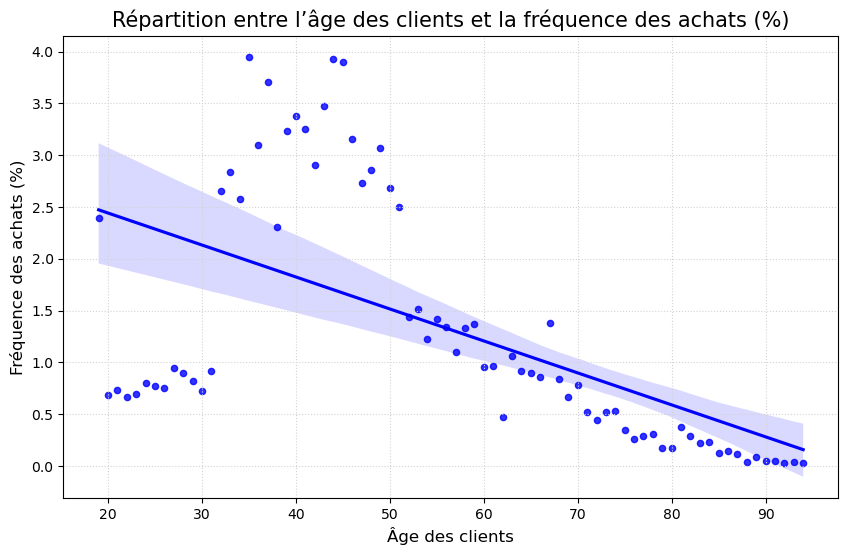

Fréquence d'achats pour les clients âgés de 19 ans :


,age_group,age_client,quantité_transactions,fréquence_achats_%
0,10-20,19.0,15152,2.39


In [110]:
# Représentation graphique en nuage de points entre ces 2 variables

plt.figure(figsize=(10,6))

sns.regplot(data=df_age_freq, x="age_client", y="fréquence_achats_%", scatter_kws={"s":20}, color="b")
plt.grid(linestyle="dotted", color="lightgray")
plt.xlabel("Âge des clients", fontsize=12)
plt.ylabel("Fréquence des achats (%)", fontsize=12)
plt.title("Répartition entre l’âge des clients et la fréquence des achats (%)", fontsize=15)

plt.show()

print("Fréquence d'achats pour les clients âgés de 19 ans :")
display(df_age_freq.loc[df_age_freq["age_client"] < 20])

### - Coefficient de corrélation entre l'âge des clients et la fréquence des achats

In [111]:
# Coefficient de Pearson

coeff_corr = st.pearsonr(df_age_freq["age_client"],df_age_freq["fréquence_achats_%"])[0]
print("Le coefficient de corrélation représente", coeff_corr)

Le coefficient de corrélation représente -0.5745869049993576


La représentation graphique en nuage de points de la répartition entre l'âge des clients et la fréquence des achats fait apparaître 3 secteurs principaux.

Entre 19 et 31 ans, la fréquence d'achats des clients est située sous la barre des 1 %, hormis une valeur égale à 2.23 % pour les clients âgés de 19 ans (affichée dans le tableau sous le graphique).

À partir de 32 ans jusqu'à 51 ans, la fréquence des achats se situe au dessus des 2 %.

Au-delà de 51 ans la fréquence des achats va progressivement diminuer jusqu'à atteindre un seuil proche de 0 %.

**La droite de régression linéaire est en tendance baissière avec son coefficient de corrélation négatif de -0.57. Cela veut dire que la fréquence des achats diminue avec l'augmentation de l'âge des clients.**

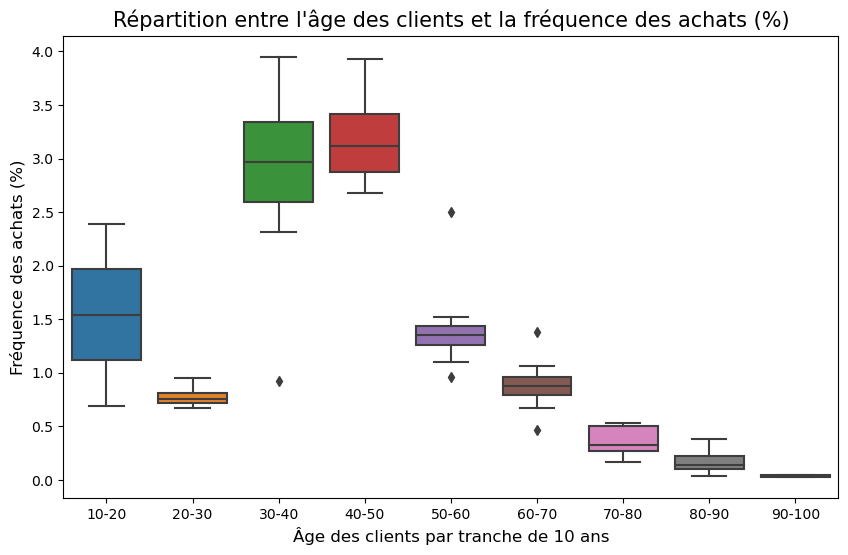

In [112]:
# Représentation graphique en boîtes entre l'âge des clients (tranche de 10 ans) et la fréquence des achats

plt.figure(figsize=(10,6))

sns.boxplot(data=df_age_freq, x="age_group", y="fréquence_achats_%")

plt.xlabel("Âge des clients par tranche de 10 ans", fontsize=12)
plt.ylabel("Fréquence des achats (%)", fontsize=12)
plt.title("Répartition entre l'âge des clients et la fréquence des achats (%)", fontsize=15)

plt.show()

La représentation graphique en boîte de la fréquence des achats par rapport à l'âge des clients nous indique un étalement plutôt homogène des âges avec une confirmation de l'augmentation de fréquence d'achats entre 32 et 51 ans et la diminution progressive après 51 ans.

### D) Lien entre l'âge des clients et le montant du panier moyen
(Cas de 2 variables quantitatives)

**Problématique :**

Y a-t-il un lien entre l'âge des clients et le montant du panier moyen ?

**Hypothèses :**

H0 : L'âge des clients et le montant du panier moyen ne sont pas corrélés.

H1 : L'âge des clients et le montant du panier moyen sont corrélés.

**Seuil de vérification à 5 %** qui permet ou non de rejeter l'hypothèse nulle.

In [113]:
# Taille du panier moyen par client par âge

df_age_pm = df_age_montant[["price", "age_client"]].copy()
df_age_pm = df_age_pm.groupby("age_client")["price"].mean().round(2).reset_index()

df_age_pm = df_age_pm.rename(columns={"price" : "panier_moyen"})
print("Table des montants du panier moyen répartis par l'âge des clients :")
display(df_age_pm)

# Taille du panier moyen par client par âge et catégorie

df_age__categ_pm = df_age_montant[["price", "categ", "age_client"]].copy()
df_age__categ_pm = df_age__categ_pm.groupby(["age_client", "categ"])["price"].mean().round(2).reset_index()


df_age__categ_pm = df_age__categ_pm.rename(columns={"price" : "panier_moyen"})
print("Table des montants du panier moyen réparti par l'âge des clients et par catégorie de produits :")
display(df_age__categ_pm)

Table des montants du panier moyen répartis par l'âge des clients :


,age_client,panier_moyen
0,19.0,40.20
1,20.0,40.77
2,21.0,40.18
3,22.0,41.98
4,23.0,37.39
...,...,...
71,90.0,16.12
72,91.0,16.22
73,92.0,16.56
74,93.0,17.76


Table des montants du panier moyen réparti par l'âge des clients et par catégorie de produits :


,age_client,categ,panier_moyen
0,19.0,0.0,10.51
1,19.0,1.0,20.70
2,19.0,2.0,75.64
3,20.0,0.0,10.52
4,20.0,1.0,20.52
...,...,...,...
223,93.0,1.0,20.63
224,93.0,2.0,55.99
225,94.0,0.0,9.19
226,94.0,1.0,19.34


### - Test de normalité de Shapiro-Wilk qui vérifie si les données sont normalement distribuées

In [114]:
# Sur l'âge des clients

print("Comme vu précédemment, l'échantillon âge des clients n'est pas normalement distribué.\n")

# Sur la taille du panier moyen

w, p = st.shapiro(df_age_pm["panier_moyen"])
print("P-valeur pour l'échantillon panier moyen :", p)

# Si p > 0.05, on peut conclure que l'échantillon est normalement distribué
if p > 0.05:
    print("l'échantillon panier moyen est normalement distribué.")
else:
    print("l'échantillon panier moyen n'est pas normalement distribué.")

Comme vu précédemment, l'échantillon âge des clients n'est pas normalement distribué.

P-valeur pour l'échantillon panier moyen : 5.19640103516239e-13
l'échantillon panier moyen n'est pas normalement distribué.


### - Représentation graphique de la distribution de la variable panier moyen

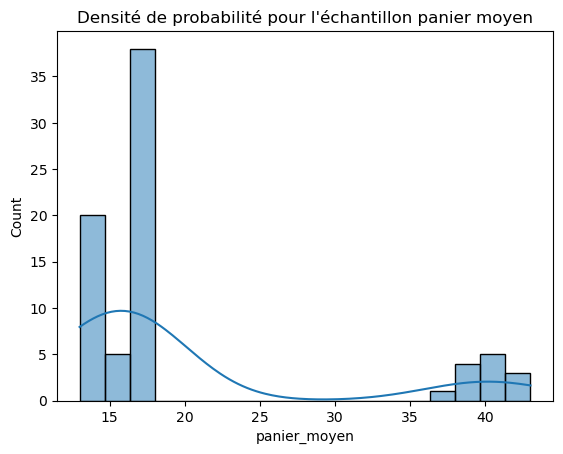

In [115]:
# Diagramme de densité de probabilité pour l'échantillon panier moyen
sns.histplot(df_age_pm["panier_moyen"], kde=True)
plt.title("Densité de probabilité pour l'échantillon panier moyen")
plt.show()

### - Test de Mann-Whitney dans le cadre de 2 variables quantitatives qui ne respectent pas une distribution normale

In [116]:
# Test de Mann-Whitney pour vérifier si les médianes des deux échantillons sont significativement différentes

stat, p = mannwhitneyu(df_age_pm["age_client"], df_age_pm["panier_moyen"])
print("Stat :", stat, "\nP-valeur :", p)

# Si p < 0.05, on peut rejeter l'hypothèse nulle selon laquelle les médianes des deux échantillons sont égales
if p < 0.05:
    print("Les médianes des deux échantillons sont significativement différentes.")
else:
    print("Les médianes des deux échantillons ne sont pas significativement différentes.")


Stat : 5493.0 
P-valeur : 8.181960319364256e-22
Les médianes des deux échantillons sont significativement différentes.


Grâce aux test de normalité de Shapiro-Wilk nous constatons que les données ne respectent pas une distribution normale.

Dans ce cas nous utilisons le test de Mann-Whitney et nous observons que les médianes des deux échantillons sont significativement différentes.

Il n'y a donc pas de corrélation entre l'âge des clients et le panier moyen.

### - Test de Spearman

In [117]:
from scipy.stats import spearmanr

# Récupération des données pour les colonnes "x" et "y"
x = df_age_pm["age_client"]
y = df_age_pm["panier_moyen"]

# Test de Spearman
rho, p = spearmanr(x, y)
print(f"rho = {rho:.3f}, p = {p:.3f}")

# Si p < 0.05, on peut rejeter l'hypothèse nulle selon laquelle il n'y a pas de corrélation monotone entre les variables
if p < 0.05:
    print("Il y a une corrélation monotone entre les variables.")
else:
    print("Il n'y a pas de corrélation monotone entre les variables.")

rho = -0.085, p = 0.466
Il n'y a pas de corrélation monotone entre les variables.


Le coefficient de corrélation monotone Rho est égal à -0.085. Il est plus proche de 0 que de -1 ou 1. Avec une p-valeur supérieure à notre seuil de risque de 5%, cela veut dire qu'il n'y a pas de corrélation entre l'âge des clients et le panier moyen.

Nous ne pouvons prédire le montant du panier moyen en fonction de l'âge des clients.

### - Représentation graphique entre l'âge des clients et la valeur du panier moyen

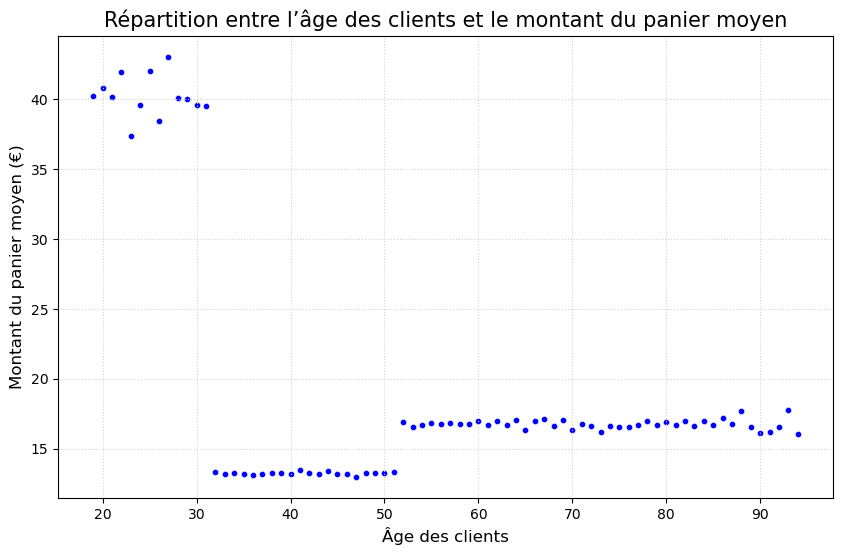

In [118]:
# Représentation graphique en nuage de points entre ces 2 variables

plt.figure(figsize=(10,6))

sns.scatterplot(data=df_age_pm, x="age_client", y="panier_moyen", s=20, color="b")
plt.grid(linestyle="dotted", color="lightgray")
plt.xlabel("Âge des clients", fontsize=12)
plt.ylabel("Montant du panier moyen (€)", fontsize=12)
plt.title("Répartition entre l’âge des clients et le montant du panier moyen", fontsize=15)

plt.show()

La représentation graphique de la répartition du panier moyen par âge des clients nous montre une scission claire entre 3 groupes.

Les clients de 19 à 31 ans ont un panier moyen entre environ 35 et 45 €. Ceux de 32 à 51 ans réalisent un panier moyen d'environ 13 €. Enfin, au dessus de 51 ans, la valeur du panier moyen se situe à environ 17 €.

**Il n'y a pas de corrélation entre ces 2 variables et le tracé d'une droite de régression linéaire, même si il est toujours possible, n'aurait pas de sens.**

### E) Lien entre l'âge des clients et la catégorie des livres achetés
(Cas entre une variable quantitative et une variable qualitative)

#### **Problématique :**

Y a-t-il un lien entre l'âge des clients et la catégorie des livres achetés ?

**Hypothèses :**

H0 : Les moyennes des groupes de chaque catégorie sont égales.

H1 : Les moyennes des groupes de chaque catégorie sont différentes.

**Seuil de vérification à 5 %** qui permet ou non de rejeter l'hypothèse nulle.

In [129]:
# Tableau de l'âge des clients et de la catégorie de livres achetés

df_age_categ = df_age_montant.loc[(~df_age_montant["age_client"].isnull()) & (~df_age_montant["categ"].isnull())]
df_age_categ = df_age_categ[["age_client", "categ"]]
display(df_age_categ.head())

# Création de 3 tables dans chaque catégorie de livres achetés et classées par âge des clients

df_age_categ_0 = df_age_categ[df_age_categ["categ"]==0].reset_index()
display(df_age_categ_0.head())
df_age_categ_1 = df_age_categ[df_age_categ["categ"]==1].reset_index()
display(df_age_categ_1.head())
df_age_categ_2 = df_age_categ[df_age_categ["categ"]==2].reset_index()
display(df_age_categ_2.head())

,age_client,categ
0,32.0,0.0
1,32.0,0.0
2,32.0,0.0
3,32.0,0.0
4,32.0,0.0


,index,age_client,categ
0,0,32.0,0.0
1,1,32.0,0.0
2,2,32.0,0.0
3,3,32.0,0.0
4,4,32.0,0.0


,index,age_client,categ
0,6,32.0,1.0
1,23,32.0,1.0
2,24,32.0,1.0
3,25,32.0,1.0
4,33,32.0,1.0


,index,age_client,categ
0,434,56.0,2.0
1,600,39.0,2.0
2,601,39.0,2.0
3,1109,64.0,2.0
4,1166,40.0,2.0


### - Test de Kruskal-Wallis sur les catégories de produits
Utilisé pour comparer la moyenne d'une variable quantitative (âge des clients) entre plusieurs groupes formés par une variable qualitative (catégorie des livres achetés). Il peut être utilisé pour des données non normalisées comme la variable âge des clients, vu précédemment.

In [120]:
# Test de Kruskal-Wallis

from scipy.stats import kruskal

# Sélection des données pour la variable quantitative age_client et la variable qualitative categ
data_kruskal_wallis = [df_age_categ[df_age_categ["categ"] == group]["age_client"] for group in df_age_categ["categ"].unique()]

stat, p = kruskal(*data_kruskal_wallis)
print(f"stat = {stat:.3f}, p-valeur = {p:.10f}")

# Si p < 0.05, on peut rejeter l'hypothèse nulle selon laquelle les moyennes des groupes sont égales
if p < 0.05:
    print("Les moyennes des groupes sont significativement différentes.")
else:
    print("Les moyennes des groupes ne sont pas significativement différentes.")

stat = 72209.483, p-valeur = 0.0000000000
Les moyennes des groupes sont significativement différentes.


### - Test Anova
Utilisé pour comparer les moyennes d'une variable quantitative entre plusieurs groupes formés par une variable qualitative. Il suppose que les données sont normalement distribuées et ont des variances similaires.

In [121]:
# Test ANOVA

from scipy.stats import f_oneway

# Sélection des données pour la variable quantitative "age_client" et la variable qualitative "categ"
data_anova = [df_age_categ[df_age_categ["categ"] == group]["age_client"] for group in df_age_categ["categ"].unique()]

# Test ANOVA
stat, p = f_oneway(*data_anova)
print(f"stat = {stat:.3f}, p = {p:.10f}")

# Si p < 0.05, on peut rejeter l'hypothèse nulle selon laquelle les moyennes des groupes sont égales
if p < 0.05:
    print("Les moyennes des groupes sont significativement différentes.")
else:
    print("Les moyennes des groupes ne sont pas significativement différentes.")

stat = 40407.204, p = 0.0000000000
Les moyennes des groupes sont significativement différentes.


### - Test de Student sur chaque catégorie de produits

In [122]:
from scipy.stats import ttest_ind

# Sélection des données pour les colonnes "age_client" et "categ" de la catégorie 0
age_client_0 = df_age_categ_0["age_client"]
categ_0 = df_age_categ_0["categ"]

# Test t de Student pour la catégorie 0
t, p = ttest_ind(age_client_0, categ_0, equal_var=False)
print(f"t = {t:.3f}, p = {p:.3f}")

# Si p < 0.05, on peut rejeter l'hypothèse nulle selon laquelle il n'y a pas de différence de moyenne entre les deux groupes
if p < 0.05:
    print("Il y a une différence de moyenne significative entre les groupes.")
else:
    print("Il n'y a pas de différence de moyenne significative entre les groupes.")

t = 2420.653, p = 0.000
Il y a une différence de moyenne significative entre les groupes.


In [124]:
# Sélection des données pour les colonnes "age_client" et "categ" de la catégorie 1
age_client_1 = df_age_categ_1["age_client"]
categ_1 = df_age_categ_1["categ"]

# Test t de Student pour la catégorie 1
t, p = ttest_ind(age_client_1, categ_1, equal_var=False)
print(f"t = {t:.3f}, p = {p:.3f}")

# Si p < 0.05, on peut rejeter l'hypothèse nulle selon laquelle il n'y a pas de différence de moyenne entre les deux groupes
if p < 0.05:
    print("Il y a une différence de moyenne significative entre les groupes.")
else:
    print("Il n'y a pas de différence de moyenne significative entre les groupes.")

t = 1394.762, p = 0.000
Il y a une différence de moyenne significative entre les groupes.


C:\Users\open_\AppData\Local\Temp\ipykernel_12832\2436688261.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = ttest_ind(age_client_1, categ_1, equal_var=False)


In [125]:
# Sélection des données pour les colonnes "age_client" et "categ" de la catégorie 2
age_client_2 = df_age_categ_2["age_client"]
categ_2 = df_age_categ_2["categ"]

# Test t de Student pour la catégorie 2
t, p = ttest_ind(age_client_2, categ_2, equal_var=False)
print(f"t = {t:.3f}, p = {p:.3f}")

# Si p < 0.05, on peut rejeter l'hypothèse nulle selon laquelle il n'y a pas de différence de moyenne entre les deux groupes
if p < 0.05:
    print("Il y a une différence de moyenne significative entre les groupes.")
else:
    print("Il n'y a pas de différence de moyenne significative entre les groupes.")

t = 457.052, p = 0.000
Il y a une différence de moyenne significative entre les groupes.


C:\Users\open_\AppData\Local\Temp\ipykernel_12832\4245303151.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = ttest_ind(age_client_2, categ_2, equal_var=False)


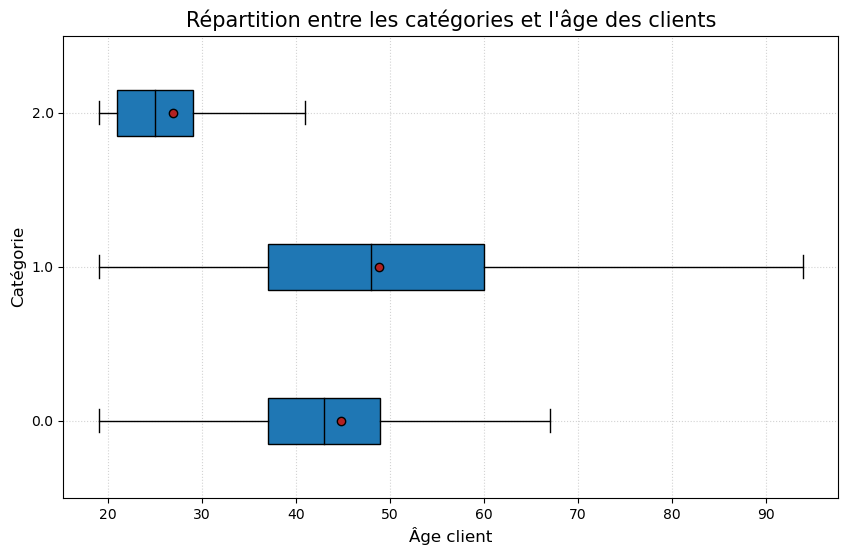

In [126]:
# Représentation graphique de l'âge des clients et la catégorie de livres achetés

categories = df_age_categ["categ"].unique()
groupes = []

for c in categories:
    groupes.append(df_age_categ[df_age_categ["categ"] == c]["age_client"])
    
plt.figure(figsize=(10,6))
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=categories, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.grid(linestyle="dotted", color="lightgray")
plt.xlabel("Âge client", fontsize=12)
plt.ylabel("Catégorie", fontsize=12)
plt.title("Répartition entre les catégories et l'âge des clients", fontsize=15)

plt.show()